<h1 style="padding:8px; margin:0px -20px; color:#FFF; background:#2E1A24;text-align:center;">
Quand les données racontent la vie : les secrets du sang
</h1>

- AFTISSE Melissa (< aftisse.melissa@etu.u-bordeaux.fr >)
- RAVENDIRANE Gayathiri (< gayathiri.ravendirane@etu.u-bordeaux.fr >)

Version : 2.0

<h2 style="padding:10px; color:#FFF; background:#882255">Introduction</h2>

<h2 style="color:#882255">Contexte et motivation</h2>

<p>Le don de sang est un acte solidaire essentiel qui sauve des milliers de vies chaque année. Pourtant, derrière ce geste altruiste se cachent des enjeux de santé publique complexes : comprendre les facteurs de risque liés aux variations de pression artérielle chez les donneurs, optimiser la sécurité des dons, et identifier les profils nécessitant un suivi particulier.</p>

<p>Notre projet s'inscrit dans une démarche d'analyse de données biomédicales en croisant <strong>sept sources diversifiées</strong> : données cliniques (pression artérielle, valeurs sanguines), informations démographiques (groupes sanguins par pays, comportements de don), données épidémiologiques (prévalence de l'hypertension en Inde), et imagerie médicale (cellules sanguines). Cette hétérogénéité nous permet d'explorer le sujet sous plusieurs angles complémentaires.</p>

<h2 style="color:#882255">Problématiques et questions de recherche</h2>

<p>À travers ce travail, nous cherchons à répondre aux questions suivantes :</p>

<strong>📊 Analyses descriptives et corrélations :</strong>
<ul>
  <li>Quels sont les profils démographiques et cliniques des donneurs de sang selon les différentes bases de données ?</li>
  <li>Existe-t-il des corrélations entre les paramètres biologiques (hémoglobine, glucose, cholestérol) et les variations de pression artérielle ?</li>
  <li>Comment la distribution des groupes sanguins varie-t-elle géographiquement, et peut-on identifier des zones avec des besoins spécifiques en don ?</li>
</ul>

<strong>⚕️ Évaluation des risques :</strong>
<ul>
  <li>Quels sont les facteurs de risque d'hypotension ou d'hypertension post-don (âge, sexe, fréquence des dons, conditions préexistantes) ?</li>
  <li>Peut-on établir des seuils d'alerte basés sur les valeurs cliniques pour prévenir les complications lors du don ?</li>
  <li>Quelles populations présentent une prévalence élevée d'hypertension et nécessiteraient une surveillance accrue ?</li>
</ul>

<strong>🤖 Modélisation prédictive :</strong>
<ul>
  <li>Est-il possible de prédire la variation de pression artérielle après un don en fonction des caractéristiques du donneur ?</li>
  <li>Peut-on construire un modèle de classification pour identifier les "profils à risque" nécessitant une intervention préventive ?</li>
  <li>L'analyse d'images de cellules sanguines par machine learning peut-elle apporter des informations complémentaires sur l'état de santé des donneurs ?</li>
</ul>

<strong>🌍 Perspectives géographiques et temporelles :</strong>
<ul>
  <li>Comment les comportements de don évoluent-ils dans le temps (fréquence, fidélisation des donneurs) ?</li>
  <li>Quelles sont les disparités régionales en termes de santé cardiovasculaire et de disponibilité des groupes sanguins ?</li>
</ul>

<p>Ces questions guideront notre analyse tout au long du projet, en mobilisant des techniques variées : visualisations interactives, tests statistiques, modèles prédictifs, et potentiellement des approches de deep learning pour l'analyse d'images médicales.</p>

<h2 style="padding:10px; color:#FFF; background:#882255">Importation du jeux de données</h2>

In [2]:
# IMPORTS 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
import requests
from PIL import Image
from io import BytesIO
from sklearn.impute import KNNImputer
from bs4 import BeautifulSoup
import re, time, json
from urllib.parse import urljoin, urlparse
from urllib import robotparser
from collections import Counter
import random
from pathlib import Path
import xml.etree.ElementTree as ET
from urllib.parse import urljoin, urlparse
import os, hashlib


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">1–HyperRisk_kaggle</h3>

<a href="https://www.kaggle.com/datasets/khan1803115/hypertension-risk-model-main " style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (4240, 13)
- **Type de données présentes :** numérique
- **Format du fichier :** `.csv`
- **Points clés :** variables liées à l’**hypertension** et facteurs de risque (âge, mesures cliniques). Utile pour créer des indicateurs de risque, segmenter des patients et entraîner des modèles prédictifs.

In [3]:
HyperRisk_kaggle = pd.read_csv("https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/HyperRisk_kaggle.csv")
print(HyperRisk_kaggle.shape)
HyperRisk_kaggle.head()

(4240, 13)


,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">2–BloodPressure_kaggle</h3>

<a href="https://www.kaggle.com/datasets/jayaprakashpondy/blood-pressure " style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (2000, 15)
- **Type de données présentes :** numérique 
- **Format du fichier :** `.csv`
- **Points clés :** mesures de pression artérielle (systolique/diastolique) et métadonnées (p. ex. âge, sexe, habitudes). Utile pour la distribution des BP, la définition de seuils (normale/élevée/hypertension) et l’étude de corrélations.

In [4]:
BloodPressure_kaggle = pd.read_csv("https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/BloodPressure_kaggle.csv")
print(BloodPressure_kaggle.shape)
BloodPressure_kaggle.head()

(2000, 15)


,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">3–BloodValues_kaggle</h3>

<a href="https://www.kaggle.com/datasets/ilhanuysal/bloodvalues  " style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (4598, 14)
- **Type de données présentes :** numérique
- **Format du fichier :** `.csv`
- **Points clés :** paramètres biologiques (valeurs sanguines) permettant des analyses de profils, la détection d’anomalies et le croisement avec BP/hypotension pour enrichir les features des modèles.

In [5]:
BloodValues_kaggle = pd.read_excel("https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/BloodValues_kaggle.xlsx")
print(BloodValues_kaggle.shape)
BloodValues_kaggle.head()

(4598, 14)


,"Gender (0:Female, 1: Male)",Age,Glucose (fasting),AST (Aspartat Aminotransferaz),ALT (Alanin Aminotransferaz),Creatinine,blood urea nitrogen (BUN),blood urea nitrogen - [ÜRE],Thyroid Stimulating Hormone (TSH),Triglyceride,Cholesterol,High Density Lipoprotein (HDL Cholesterol),Low Density Lipoprotein (LDL Cholesterol),Free T4 (FT4)
0,0,59,90,14,12,0.81,11,23.54,0.979,109,196,67.3,107,1.590
1,0,69,144,19,14,0.75,16,34.24,2.420,107,178,46.1,111,0.935
2,0,63,314,11,17,0.86,12,25.68,7.690,443,188,51.4,77,1.320
3,0,63,228,7,17,0.81,21,44.94,3.860,161,248,42.2,174,1.280
4,1,66,97,18,21,0.98,24,51.36,0.414,84,164,41.1,106,1.290


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">4–BloodGroupWW_kaggle (distribution des groupes sanguins par pays)</h3>

<a href="https://www.kaggle.com/datasets/shuvokumarbasak4004/global-blood-group-distribution-worldwide-dataset  " style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (126, 10)
- **Type de données présentes :** catégorielle, numérique
- **Format du fichier :** `.csv`
- **Points clés :** répartition des groupes sanguins (A, B, AB, O, Rh) par pays. Utile pour des cartes/charts comparatifs, analyses géographiques et mise en relation disponibilité/besoins médicaux.

In [6]:
BloodGroupWW_kaggle = pd.read_csv("https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/BloodGroupWW_kaggle/cleaned_blood_type_distribution_by_country.csv")
print(BloodGroupWW_kaggle.shape)
BloodGroupWW_kaggle.head()

(126, 10)


,Country/Dependency,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,"3,074,579",34.10%,31.20%,14.50%,5.20%,6.00%,5.50%,2.60%,0.90%
1,Algeria,"43,576,691",40.00%,30.00%,15.00%,4.25%,6.60%,2.30%,1.10%,0.75%
2,Argentina,"45,479,118",50.34%,31.09%,8.20%,2.16%,4.29%,2.98%,0.74%,0.20%
3,Armenia,"3,021,324",29.00%,46.30%,12.00%,5.60%,2.00%,3.70%,1.00%,0.40%
4,Australia,"25,466,459",38.00%,32.00%,12.00%,4.00%,7.00%,6.00%,2.00%,1.00%


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">5–BloodDonation_kaggle</h3>

<a href="https://www.kaggle.com/datasets/kundanbedmutha/blood-donation-portal-dataset  " style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (4598, 14)
- **Type de données présentes :** catégorielle, numérique et dates
- **Format du fichier :** `.csv`
- **Points clés :** ce jeu de données contient des informations démographiques, des conditions médicales et des informations d’éligibilité. Il ouvre la voie à des analyses descriptives des donneurs en explorant les variables (age, sexe, type de sang, cdt medicales...), à des modélisations prédictives des dons (afin d'optimiser les campagnes de relance par exemple)...

In [7]:
BloodDonation_kaggle = pd.read_csv("https://melissa-aftisse.emi.u-bordeaux.fr/DATA/blood_donation.csv")
print(BloodDonation_kaggle.shape)
BloodDonation_kaggle.head()

(10000, 18)


,Donor_ID,Full_Name,Gender,Age,Blood_Group,Contact_Number,Email,City,State,Country,Last_Donation_Date,Total_Donations,Eligible_for_Donation,Medical_Condition,Weight_kg,Hemoglobin_g_dL,Donation_Center,Registration_Date
0,DNR000001,Sangeeta Menon,Female,38,O+,1819600042,sangeeta.menon8280@gmail.com,Kolkata,West Bengal,India,07-10-2025,1,Yes,NaN,66.6,13.6,Red Cross Blood Bank,02-07-2021
1,DNR000002,Meena Iyer,Female,49,B+,265423420,meena.iyer6225@gmail.com,Jaipur,Rajasthan,India,08-11-2020,1,No,Hypertension,70.8,14.0,Metro Blood Bank,03-03-2023
2,DNR000003,Priya Nair,Female,29,B+,1849593012,priya.nair4742@gmail.com,Gurgaon,Haryana,India,12-04-2025,2,No,Diabetes,73.4,12.5,Fortis Blood Bank,15-10-2015
3,DNR000004,Vijay Kapoor,Male,29,O+,3419283185,vijay.kapoor4423@gmail.com,Thiruvananthapuram,Kerala,India,21-02-2025,1,Yes,NaN,57.9,14.8,NABL Blood Centre,09-05-2022
4,DNR000005,Rahul Iyer,Male,27,A+,6413953676,rahul.iyer2341@gmail.com,Bhopal,Madhya Pradesh,India,18-04-2024,1,Yes,NaN,74.0,17.1,NABL Blood Centre,13-07-2022


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">6–BloodIndia_gouv</h3>

<a href="https://www.data.gov.in/resource/stateut-wise-prevalence-hypertension-blood-glucose-obesity-among-adults-and-overweight" style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (36, 8)
- **Type de données présentes :** numérique (pourcentages), catégorielle (États/Territoires de l'Inde)
- **Format du fichier :** `.json`
- **Points clés :** données épidémiologiques par État/Territoire indien concernant la prévalence de l'**hypertension**, du diabète (glucose sanguin élevé), de l'obésité et du surpoids chez les adultes. Utile pour des analyses géographiques comparatives, l'identification de zones à risque élevé, et l'étude des corrélations entre différents indicateurs de santé. Permet de contextualiser les problématiques de santé liées au sang dans un cadre géographique spécifique.

In [8]:
# 1. Define the URL
url = "https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/BloodIndia_gouv.json"

try:
    # 2. Fetch the data using requests
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

    # 3. Parse the JSON content into a Python dictionary
    data_dict = response.json()

    # 4. Manually extract column names and data rows
    # The column names are under the 'label' key in the 'fields' list
    column_names = [field['label'] for field in data_dict['fields']]
    
    # The actual data is under the 'data' key
    data_rows = data_dict['data']

    # 5. Create the DataFrame
    BloodIndia_gouv = pd.DataFrame(data_rows, columns=column_names)

    # Display the result
    print("Data loaded successfully.")
    print(BloodIndia_gouv.shape)
    print(BloodIndia_gouv.head())

except requests.exceptions.RequestException as e:
    print(f"Error fetching the URL: {e}")
except KeyError as e:
    print(f"Error parsing JSON structure. Missing expected key: {e}")

Data loaded successfully.
(36, 8)
                      State/UT  \
0                        India   
1  Andaman and Nicobar Islands   
2               Andhra Pradesh   
3            Arunachal Pradesh   
4                        Assam   

  Prevalence of Hypertension1 Among Women Age 15 and Over  \
0                                               21.3        
1                                               25.3        
2                                               25.3        
3                                               24.9        
4                                               19.1        

  Prevalence of Hypertension1 Among Men Age 15 and Over  \
0                                                 24      
1                                               30.2      
2                                                 29      
3                                               33.1      
4                                               20.3      

  Percentage of Women Age 15 and Over w

<h3 style="padding:10px; color:#FFF; background:#E3CFC6">7–BCCD_github</h3>

<a href="https://github.com/akshaylamba/all_CELL_data.git" style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (410+ images, annotations XML associées)
- **Type de données présentes :** images microscopiques de cellules sanguines avec annotations XML (coordonnées de bounding boxes)
- **Format du fichier :** `.jpg` (images) et `.xml` (annotations)
- **Points clés :** collection d'images de frottis sanguins colorés montrant différents types de cellules (globules rouges, globules blancs, plaquettes). Chaque image est accompagnée d'un fichier XML contenant les annotations pour la détection d'objets. Idéal pour entraîner des modèles de **computer vision** (détection d'objets, classification de cellules) et pour l'apprentissage automatique appliqué à l'analyse d'images médicales.


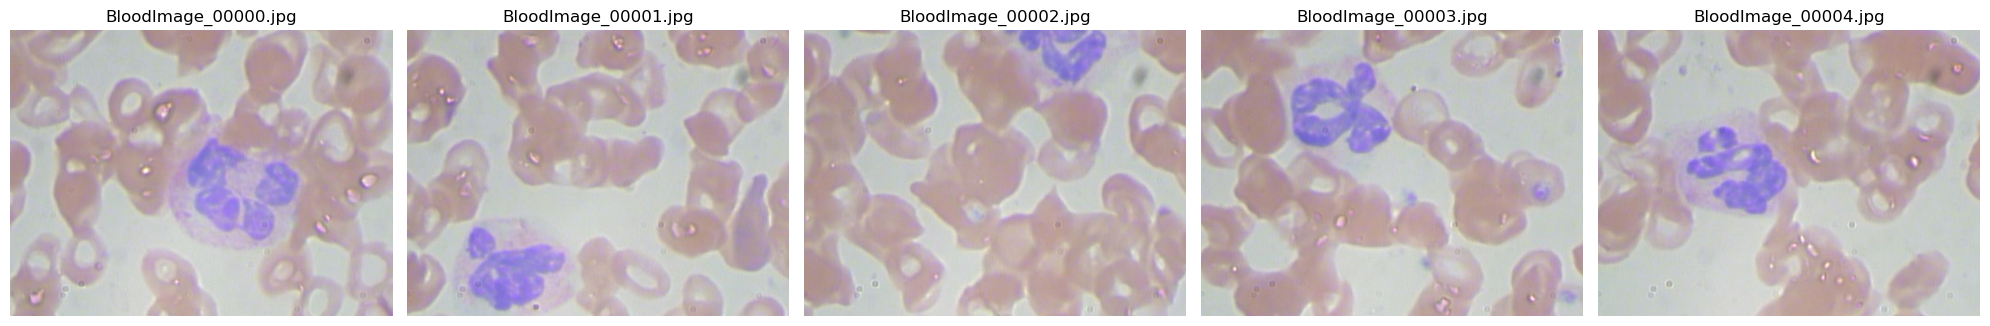

In [9]:
# Base URL for blood images
base_url = "https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/BCCD_github/"

# List of first 5 image filenames
image_files = [
    "BloodImage_00000.jpg",
    "BloodImage_00001.jpg",
    "BloodImage_00002.jpg",
    "BloodImage_00003.jpg",
    "BloodImage_00004.jpg"
]

# Create a figure with a 1x5 grid
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for idx, img_file in enumerate(image_files):
    img_url = base_url + img_file
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    axes[idx].imshow(img)
    axes[idx].set_title(img_file)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

<h3 style="padding:10px; color:#FFF; background:#E3CFC6">8–Mayo Clinic (pages publiques de santé)</h3>

<ul>
  <li><strong>Objectif :</strong> extraire des contenus <em>liés au sang</em> : tests sanguins (CBC, hémoglobine, hématocrite, ferritine, frottis sanguin, coagulation), composantes et pathologies (anémie, leucémie, hémophilie, thrombocytopénie, drépanocytose...).</li>
  <li><strong>Stratégie :</strong> pages HTML statiques uniquement, respect de <em>robots.txt</em>; index par lettre + <em>liste de graines</em> (URLs ciblées) pour garantir une base minimale; filtrage pour ne conserver que les pages explicitement <em>blood-related</em>.</li>
  <li><strong>Données collectées :</strong>
    <ul>
      <li><em>Tests</em> : titre, URL, description (Overview), sections clés (Symptoms / Risk factors / Results / Why it's done), indices d’unités et de plages (détectés dans textes/tableaux).</li>
      <li><em>Maladies</em> : titre, URL, description, <em>Symptoms</em>, <em>Risk factors</em>.</li>
      <li><em>Relations</em> : appariements tests ↔ maladies via TF‑IDF + matching de nom; clustering simple des maladies par impact sanguin.</li>
    </ul>
  </li>
  <li><strong>Sorties :</strong> fichiers CSV sous <code>DATA/scraped_mayo/</code> : <code>mayo_tests.csv</code>, <code>mayo_diseases.csv</code>, <code>mayo_relations.csv</code>, <code>mayo_disease_clusters.csv</code>.</li>
  <li><strong>Limites :</strong> les slugs/URLs peuvent changer; certaines graines peuvent échouer (404) — le code journalise ces cas et continue; la détection d’unités/plages est heuristique; contenu public uniquement.</li>
</ul>

In [10]:
# # Mayo Clinic scraping helpers (ethical, low-rate)

# BASE = "https://www.mayoclinic.org"
# ALLOWED_PATHS = ["/tests-procedures/", "/diseases-conditions/"]
# HEADERS = {
#     "User-Agent": "UBx-EDU BloodDataProject (educational; contact: students@u-bordeaux.fr)",
#     "Accept-Language": "en-US,en;q=0.9",
# }

# # Respect robots.txt
# _rp = robotparser.RobotFileParser()
# _rp.set_url(urljoin(BASE, "/robots.txt"))
# try:
#     _rp.read()
# except Exception:
#     pass

# def allowed(url: str) -> bool:
#     try:
#         p = urlparse(url)
#         if not p.netloc:
#             url = urljoin(BASE, url)
#             p = urlparse(url)
#         # Only target our whitelisted sections
#         if not any(p.path.startswith(ap) for ap in ALLOWED_PATHS):
#             return False
#         return _rp.can_fetch(HEADERS["User-Agent"], url)
#     except Exception:
#         return False

# SESSION = requests.Session()
# SESSION.headers.update(HEADERS)

# RATE_SECONDS = 2.0  # low request rate
# _last_ts = 0.0

# def fetch(url: str) -> tuple[BeautifulSoup, list[pd.DataFrame]]:
#     global _last_ts
#     if not allowed(url):
#         raise RuntimeError(f"Blocked by robots.txt or outside allowed paths: {url}")
#     # rate limit
#     now = time.time()
#     wait = RATE_SECONDS - (now - _last_ts)
#     if wait > 0:
#         time.sleep(wait)
#     _last_ts = time.time()

#     r = SESSION.get(url, timeout=20)
#     r.raise_for_status()
#     soup = BeautifulSoup(r.text, "html.parser")

#     tables = []
#     try:
#         # read_html can raise a variety of parser errors; ignore if so
#         tables = pd.read_html(r.text)
#     except Exception:
#         tables = []
#     return soup, tables

# # Generic utilities
# WS = re.compile(r"\s+")
# UNIT_RE = re.compile(r"(g/dL|mg/dL|mmol/L|%|x?10\^?9/L|mcg/L|ng/mL|fL|pg|10\^\d+/L|cells/\u00b5L)")
# RANGE_RE = re.compile(r"(\d+(?:\.\d+)?)\s*(?:to|-|–)\s*(\d+(?:\.\d+)?)\s*(g/dL|mg/dL|mmol/L|%|fL|pg|10\^\d+/L|cells/\u00b5L)?", re.I)


# def clean_text(s: str) -> str:
#     return WS.sub(" ", (s or "").strip())


# def extract_main_text(soup: BeautifulSoup) -> str:
#     # Try article or main content
#     parts = []
#     if (h1 := soup.find("h1")):
#         parts.append(clean_text(h1.get_text(" ")))
#     # Grab paragraphs in main/article regions
#     for sel in ["article", "main", "div.content", "div#main-content", "div.container"]:
#         node = soup.select_one(sel)
#         if node:
#             for p in node.find_all(["p", "li"]):
#                 txt = clean_text(p.get_text(" "))
#                 if len(txt) > 0:
#                     parts.append(txt)
#             break
#     if not parts:
#         # fallback: all paragraphs
#         for p in soup.find_all("p"):
#             parts.append(clean_text(p.get_text(" ")))
#     return "\n".join(parts)


# def extract_sections(soup: BeautifulSoup, names=("Overview", "Symptoms", "Risk factors", "When to see a doctor", "Results", "Why it's done", "What you can expect")):
#     sections = {}
#     headings = soup.find_all(["h2", "h3"])
#     for h in headings:
#         title = clean_text(h.get_text(" "))
#         for target in names:
#             if target.lower() in title.lower():
#                 # collect sibling paragraphs until next heading
#                 texts = []
#                 for sib in h.find_all_next():
#                     if sib.name in ("h2", "h3"):
#                         break
#                     if sib.name in ("p", "li"):
#                         texts.append(clean_text(sib.get_text(" ")))
#                 sections[target] = "\n".join(texts)
#     return sections


# def extract_units_and_ranges(text: str) -> dict:
#     units = sorted(set(m.group(1) for m in UNIT_RE.finditer(text)))
#     ranges = [m.groups() for m in RANGE_RE.finditer(text)]
#     return {"units": units, "ranges": ranges}


# def index_links(base_path: str, letter: str) -> list[tuple[str, str]]:
#     url = f"{BASE}{base_path}index?letter={letter.upper()}"
#     soup, _ = fetch(url)
#     links = []
#     for a in soup.select("a"):
#         href = a.get("href")
#         if not href:
#             continue
#         if href.startswith(base_path) and allowed(urljoin(BASE, href)):
#             title = clean_text(a.get_text(" "))
#             links.append((urljoin(BASE, href), title))
#     # de-dup
#     seen = set()
#     out = []
#     for u, t in links:
#         if u not in seen:
#             out.append((u, t))
#             seen.add(u)
#     return out

# TEST_KEYWORDS = [
#     "cbc", "complete blood count", "hemoglobin", "hematocrit", "glucose", "blood sugar", "cholesterol", "lipid",
#     "iron", "ferritin", "transferrin", "platelet", "prothrombin", "inr", "pt", "aptt", "blood smear",
# ]

# DISEASE_KEYWORDS = [
#     "anemia", "leukemia", "thrombocytopenia", "hemophilia", "von willebrand", "polycythemia", "thrombosis",
#     "deep vein thrombosis", "dvt", "pulmonary embolism", "clot", "clotting", "sickle cell", "thalassemia",
#     "hemolytic anemia", "aplastic anemia", "myeloma",
# ]

# LETTERS_TESTS = list({k[0].upper() for k in TEST_KEYWORDS if k}) + ["C", "H", "G", "I", "P", "F", "T", "S", "L"]
# LETTERS_DISEASES = list({k[0].upper() for k in DISEASE_KEYWORDS if k}) + ["A", "L", "T", "H", "P", "S", "V", "D"]

# print("Robots allowed for tests root?", allowed("/tests-procedures/"))
# print("Robots allowed for diseases root?", allowed("/diseases-conditions/"))
# print("Helper utilities ready.")

In [11]:
# # Seed known Mayo Clinic pages to ensure initial coverage
# test_seed = [
#     "/tests-procedures/complete-blood-count/about/pac-20384919",
#     "/tests-procedures/hemoglobin-test/about/pac-20385075",
#     "/tests-procedures/hematocrit-test/about/pac-20384728",
#     "/tests-procedures/ferritin-test/about/pac-20384928",
#     "/tests-procedures/blood-smear/about/pac-20393004",
#     # Coagulation (if available)
#     "/tests-procedures/prothrombin-time/about/pac-20385287",
# ]

# disease_seed = [
#     "/diseases-conditions/anemia/symptoms-causes/syc-20351360",
#     "/diseases-conditions/leukemia/symptoms-causes/syc-20374373",
#     "/diseases-conditions/thrombocytopenia/symptoms-causes/syc-20378293",
#     "/diseases-conditions/hemophilia/symptoms-causes/syc-20373327",
#     "/diseases-conditions/sickle-cell-anemia/symptoms-causes/syc-20355876",
#     "/diseases-conditions/thalassemia/symptoms-causes/syc-20354995",
#     "/diseases-conditions/aplastic-anemia/symptoms-causes/syc-20355015",
#     "/diseases-conditions/hemolytic-anemia/symptoms-causes/syc-20352360",
#     "/diseases-conditions/multiple-myeloma/symptoms-causes/syc-20353378",
# ]

# def collect_pages(paths, kind="test"):
#     rows = []
#     for p in paths:
#         url = urljoin(BASE, p)
#         try:
#             soup, tables = fetch(url)
#             title = clean_text(soup.find("h1").get_text(" ")) if soup.find("h1") else p.split("/")[-1]
#             text = extract_main_text(soup)
#             secs = extract_sections(soup)
#             meta = extract_units_and_ranges("\n".join([text] + list(secs.values()))) if kind=="test" else {}
#             row = {
#                 "url": url,
#                 "title": title,
#                 "description": text[:1200],
#             }
#             if kind=="test":
#                 row.update({
#                     "sections": json.dumps(secs, ensure_ascii=False),
#                     "reference_tables_count": len(tables),
#                     "units_candidates": ", ".join(meta.get("units", [])),
#                     "ranges_found": len(meta.get("ranges", [])),
#                 })
#             else:
#                 row.update({
#                     "symptoms": secs.get("Symptoms", "")[:1000],
#                     "risk_factors": secs.get("Risk factors", "")[:1000],
#                     "tables": len(tables),
#                 })
#             rows.append(row)
#         except Exception as e:
#             print(f"Seed fetch fail: {url} -> {e}")
#     return rows

# # Build/augment dataframes from seeds
# seed_tests_df = pd.DataFrame(collect_pages(test_seed, kind="test"))
# seed_diseases_df = pd.DataFrame(collect_pages(disease_seed, kind="disease"))

# # Merge with previously scraped frames if any
# if 'tests_df' in globals() and not tests_BloodPressure_kaggle.empty:
#     tests_BloodPressure_kaggle = pd.concat([tests_df, seed_tests_df], ignore_index=True).drop_duplicates(subset=["url"]).reset_index(drop=True)
# else:
#     tests_df = seed_tests_df.copy()

# if 'diseases_df' in globals() and not diseases_df.empty:
#     diseases_df = pd.concat([diseases_df, seed_diseases_df], ignore_index=True).drop_duplicates(subset=["url"]).reset_index(drop=True)
# else:
#     diseases_df = seed_diseases_df.copy()

# # Filter out non-blood-related tests
# BLOOD_TERMS = [
#     "blood", "hemoglobin", "hematocrit", "platelet", "cbc", "ferritin", "iron", "smear",
#     "coagulation", "prothrombin", "inr", "aptt", "clot", "cholesterol", "lipid"
# ]

# def is_blood_related(row):
#     txt = f"{row.get('title','')} {row.get('description','')}".lower()
#     return any(term in txt for term in BLOOD_TERMS)

# if not tests_df.empty:
#     tests_df = tests_df[tests_df.apply(is_blood_related, axis=1)].reset_index(drop=True)

# print("tests_df shape after seed & filter:", tests_df.shape)
# print("diseases_df shape after seed:", diseases_df.shape)
# display(tests_df.head(5) if not tests_df.empty else tests_df)
# display(diseases_df.head(5) if not diseases_df.empty else diseases_df)



In [12]:
mayo_diseases = pd.read_csv("https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/ScrapedMayoClinic/mayo_diseases.csv")
print(mayo_diseases.shape)
mayo_diseases.head()

(9, 6)


,url,title,description,symptoms,risk_factors,tables
0,https://www.mayoclinic.org/diseases-conditions...,Anemia,Anemia\nAnemia is a problem of not having enou...,Anemia symptoms depend on the cause and how ba...,These factors can increase risk of anemia:\nA ...,0
1,https://www.mayoclinic.org/diseases-conditions...,Leukemia,Leukemia\nLeukemia is cancer of the body's blo...,"Leukemia symptoms vary, depending on the type ...",Factors that may increase your risk of develop...,0
2,https://www.mayoclinic.org/diseases-conditions...,Thrombocytopenia (low platelet count),Thrombocytopenia (low platelet count)\nThrombo...,NaN,NaN,0
3,https://www.mayoclinic.org/diseases-conditions...,Hemophilia,Hemophilia\nHemophilia is a rare disorder in w...,"Signs and symptoms of hemophilia vary, dependi...",The biggest risk factor for hemophilia is to h...,0
4,https://www.mayoclinic.org/diseases-conditions...,Sickle cell anemia,Sickle cell anemia\nSickle cell anemia is one ...,Symptoms of sickle cell anemia usually appear ...,"For a baby to have sickle cell anemia, both pa...",0


In [13]:
mayo_tests = pd.read_csv("https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/ScrapedMayoClinic/mayo_tests.csv")
print(mayo_tests.shape)
mayo_tests.head()

(4, 7)


,url,title,description,sections,reference_tables_count,units_candidates,ranges_found
0,https://www.mayoclinic.org/tests-procedures/co...,Complete blood count (CBC),Complete blood count (CBC)\nA complete blood c...,"{""Overview"": ""A complete blood count (CBC) is ...",1,%,4
1,https://www.mayoclinic.org/tests-procedures/he...,Hemoglobin test,Hemoglobin test\nA hemoglobin test is a blood ...,"{""Overview"": ""A hemoglobin test is a blood tes...",0,NaN,2
2,https://www.mayoclinic.org/tests-procedures/he...,Hematocrit test,Hematocrit test\nA hematocrit (he-MAT-uh-krit)...,"{""Overview"": ""A hematocrit (he-MAT-uh-krit) te...",0,%,0
3,https://www.mayoclinic.org/tests-procedures/fe...,Ferritin test,Ferritin test\nA ferritin test measures the am...,"{""Overview"": ""A ferritin test measures the amo...",0,NaN,4


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">Jeux de données explorés mais non retenus</h3>

<p>Au cours de notre recherche, plusieurs jeux de données ont été envisagés mais finalement écartés pour des raisons méthodologiques :</p>

<strong> - <a href="https://www.kaggle.com/datasets/ninalabiba/blood-transfusion-dataset/data" style="color :#882255; font-style: italic">Blood Transfusion Dataset</a></strong>
<ul>
  <li><strong>Raison de l'exclusion</strong> : Seulement 4 variables explicatives (Recency, Frequency, Monetary, Time) avec 748 observations</li>
  <li><strong>Limites identifiées</strong> : 
    <ul>
      <li>Absence de données cliniques (pression artérielle, valeurs biologiques)</li>
      <li>Pas d'informations démographiques détaillées (âge, sexe, groupe sanguin)</li>
      <li>Données trop simplistes pour des modèles prédictifs robustes</li>
      <li>Impossibilité de croiser avec d'autres sources pour enrichir l'analyse</li>
    </ul>
  </li>
</ul>

<strong> - <a hearf= "https://database.coffeeinstitute.org/" style="color :#882255; font-style: italic">Coffee Quality Institute Database</a></strong>
<ul>
  <li><strong>Raison du changement de thématique</strong> : Thème initial abandonné au profit du don de sang</li>
  <li><strong>Limites constatées</strong> :
    <ul>
      <li>Manque de diversité des sources (dépendance à une seule base principale)</li>
      <li>Nombreux datasets dérivés ou redondants sur Kaggle</li>
      <li>Données peu fiables pour certaines sources secondaires</li>
      <li>Thématique moins alignée avec nos intérêts en sciences de la santé</li>
    </ul>
  </li>
</ul>



---

<h2 style="padding:10px; color:#FFF; background:#882255">PHASE 1 : EXPLORATION & NETTOYAGE</h2>

<h3 style="color:#882255">Section 1.1 : Qualité et Complétude des Données</h3>

**📊 Datasets utilisés :** 1, 2, 3, 5

**Visualisations :**
- Heatmap des valeurs manquantes (seaborn)
- Graphiques en barres des taux de complétude par colonne
- Boxplots pour détecter les outliers par variable clinique

**❓ Questions :**
- Quelles sont les variables avec le plus de données manquantes ?
- Y a-t-il des valeurs aberrantes dans les mesures cliniques (BP, glucose, cholestérol) ?


In [14]:
def detect_outliers(data_series):
    """Détecte les outliers dans une série de données en utilisant la méthode IQR."""
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]
    return outliers

In [15]:
def analyze_dataset_quality(
    df,
    clinical_vars=None,
    dataset_name="Dataset",
    completeness_threshold=95,
    outlier_detector=None,
    figsize=(16, 12),
    heatmap_cmap="YlOrRd",
    bar_color="#882255",
    outlier_bar_color="#E3CFC6",
    outlier_edge_color="#882255",
    show_plot=True,
    return_results=True,
):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from IPython.display import display

    print("="*70)
    print(f"{dataset_name} - Analyse de Qualité")
    print("="*70)

    # Valeurs manquantes (table + style)
    missing_data_df = pd.DataFrame({
        'Nombre_manquants': df.isnull().sum(),
        'Pourcentage': (df.isnull().sum() / len(df) * 100).round(2)
    })
    missing_data_df = missing_data_df[missing_data_df['Nombre_manquants'] > 0].sort_values('Nombre_manquants', ascending=False)
    print("\n❌ Valeurs manquantes par colonne:")
    if missing_data_df.empty:
        print("Aucune valeur manquante détectée ✅")
        missing_data_tbl = missing_data_df
    else:
        missing_data_tbl = (
            missing_data_df
            .reset_index()
            .rename(columns={'index': 'Colonne'})
        )
        try:
            md_style = (
                missing_data_tbl
                .style
                .format({'Pourcentage': '{:.2f}%'})
                .background_gradient(cmap='Reds', subset=['Nombre_manquants', 'Pourcentage'])
                .set_properties(**{'text-align': 'center'})
            )
            if hasattr(md_style, 'hide_index'):
                md_style = md_style.hide_index()
            display(md_style)
        except Exception:
            display(missing_data_tbl)

    # Figure globale
    fig, axes = plt.subplots(2, 2, figsize=figsize)

    # Heatmap de complétude
    sns.heatmap(df.isnull(), cbar=True, cmap=heatmap_cmap, ax=axes[0, 0], yticklabels=False)
    axes[0, 0].set_title(f"Heatmap des Valeurs Manquantes - {dataset_name}", fontsize=14, fontweight='bold')

    # Complétude par colonne (bar chart + styled table)
    completeness = (1 - df.isnull().sum() / len(df)) * 100
    completeness_sorted = completeness.sort_values()
    axes[0, 1].barh(range(len(completeness_sorted)), completeness_sorted.values, color=bar_color)
    axes[0, 1].set_yticks(range(len(completeness_sorted)))
    axes[0, 1].set_yticklabels(completeness_sorted.index, fontsize=9)
    axes[0, 1].set_xlabel('Taux de Complétude (%)', fontsize=11)
    axes[0, 1].set_title(f"Taux de Complétude par Colonne - {dataset_name}", fontsize=14, fontweight='bold')
    if completeness_threshold is not None:
        axes[0, 1].axvline(x=completeness_threshold, color='red', linestyle='--', label=f"Seuil {completeness_threshold}%")
        axes[0, 1].legend()

    print("\n📈 Taux de complétude (table stylée):")
    comp_df = (
        completeness_sorted
        .rename('Taux (%)')
        .reset_index()
        .rename(columns={'index': 'Colonne'})
    )
    try:
        comp_style = (
            comp_df
            .style
            .format({'Taux (%)': '{:.2f}%'})
            .bar(color=bar_color, subset=['Taux (%)'], vmin=0, vmax=100)
            .background_gradient(cmap='PuBu', subset=['Taux (%)'])
            .set_properties(**{'text-align': 'center'})
        )
        if hasattr(comp_style, 'hide_index'):
            comp_style = comp_style.hide_index()
        display(comp_style)
    except Exception:
        display(comp_df)

    # Variables cliniques
    if clinical_vars is None:
        clinical_vars = list(df.select_dtypes(include='number').columns)
    available_vars = [col for col in clinical_vars if col in df.columns]
    if available_vars:
        df[available_vars].boxplot(ax=axes[1, 0])
        axes[1, 0].set_title(f"Boxplots - Variables Cliniques - {dataset_name}", fontsize=14, fontweight='bold')
        axes[1, 0].set_ylabel('Valeurs', fontsize=11)
        axes[1, 0].tick_params(axis='x', rotation=45, labelsize=8)
    else:
        axes[1, 0].set_visible(False)

    # Outliers
    def _default_outlier_detector(series):
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        return series[(series < lower) | (series > upper)]

    detector = outlier_detector or _default_outlier_detector
    outlier_counts = {}
    for col in available_vars:
        s = df[col].dropna()
        try:
            outliers = detector(s)
        except Exception:
            outliers = _default_outlier_detector(s)
        outlier_counts[col] = len(outliers)

    if outlier_counts:
        axes[1, 1].bar(outlier_counts.keys(), outlier_counts.values(), color=outlier_bar_color, edgecolor=outlier_edge_color, linewidth=2)
        axes[1, 1].set_title(f"Nombre d'Outliers par Variable - {dataset_name}", fontsize=14, fontweight='bold')
        axes[1, 1].set_ylabel("Nombre d'outliers", fontsize=11)
        axes[1, 1].tick_params(axis='x', rotation=45, labelsize=8)

        # Styled outliers table
        print("\n⚠️ Outliers par variable (table stylée):")
        outlier_df = (
            pd.Series(outlier_counts)
            .rename("Nombre d'outliers")
            .sort_values(ascending=False)
            .reset_index()
            .rename(columns={'index': 'Colonne'})
        )
        try:
            out_style = (
                outlier_df
                .style
                .format({"Nombre d'outliers": '{:,.0f}'})
                .background_gradient(cmap='OrRd', subset=["Nombre d'outliers"])
                .set_properties(**{'text-align': 'center'})
            )
            if hasattr(out_style, 'hide_index'):
                out_style = out_style.hide_index()
            display(out_style)
        except Exception:
            display(outlier_df)
    else:
        axes[1, 1].set_visible(False)
        print("\n⚠️ Outliers par variable: Aucun outlier détecté sur les variables sélectionnées ✅")

    plt.tight_layout()
    if show_plot:
        plt.show()

 

In [16]:
def _mad_outliers(s, k=3.5):
    s = s.dropna()
    if s.empty:
        return s.iloc[0:0]
    med = s.median()
    mad = np.median(np.abs(s - med))
    if mad == 0:
        return s.iloc[0:0]
    z = np.abs(s - med) / (1.4826 * mad)
    return s[z > k]

def mixed_outlier_detector(series):
    name = str(getattr(series, 'name', '')).strip()
    if name == 'salt_content_in_the_diet':
        return _mad_outliers(series, k=3.5)
    # Default IQR-based detection
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]        

def cap_iqr(s):
  q1,q3=s.quantile(0.25),s.quantile(0.75);iqr=q3-q1
  return s.clip(q1-1.5*iqr,q3+1.5*iqr)   

<h4 style="padding:10px; color:#FFF; background:#E3CFC6">1–HyperRisk_kaggle</h4>


DATASET: HyperRisk_kaggle - Analyse de Qualité

❌ Valeurs manquantes par colonne:


,Colonne,Nombre_manquants,Pourcentage
0,glucose,388,9.15%
1,BPMeds,53,1.25%
2,totChol,50,1.18%
3,cigsPerDay,29,0.68%
4,BMI,19,0.45%
5,heartRate,1,0.02%



📈 Taux de complétude (table stylée):


,Colonne,Taux (%)
0,glucose,90.85%
1,BPMeds,98.75%
2,totChol,98.82%
3,cigsPerDay,99.32%
4,BMI,99.55%
5,heartRate,99.98%
6,currentSmoker,100.00%
7,male,100.00%
8,sysBP,100.00%
9,diabetes,100.00%



⚠️ Outliers par variable (table stylée):


,Colonne,Nombre d'outliers
0,glucose,188
1,sysBP,126
2,BPMeds,124
3,diabetes,109
4,BMI,97
5,diaBP,77
6,heartRate,76
7,totChol,56
8,cigsPerDay,12
9,currentSmoker,0


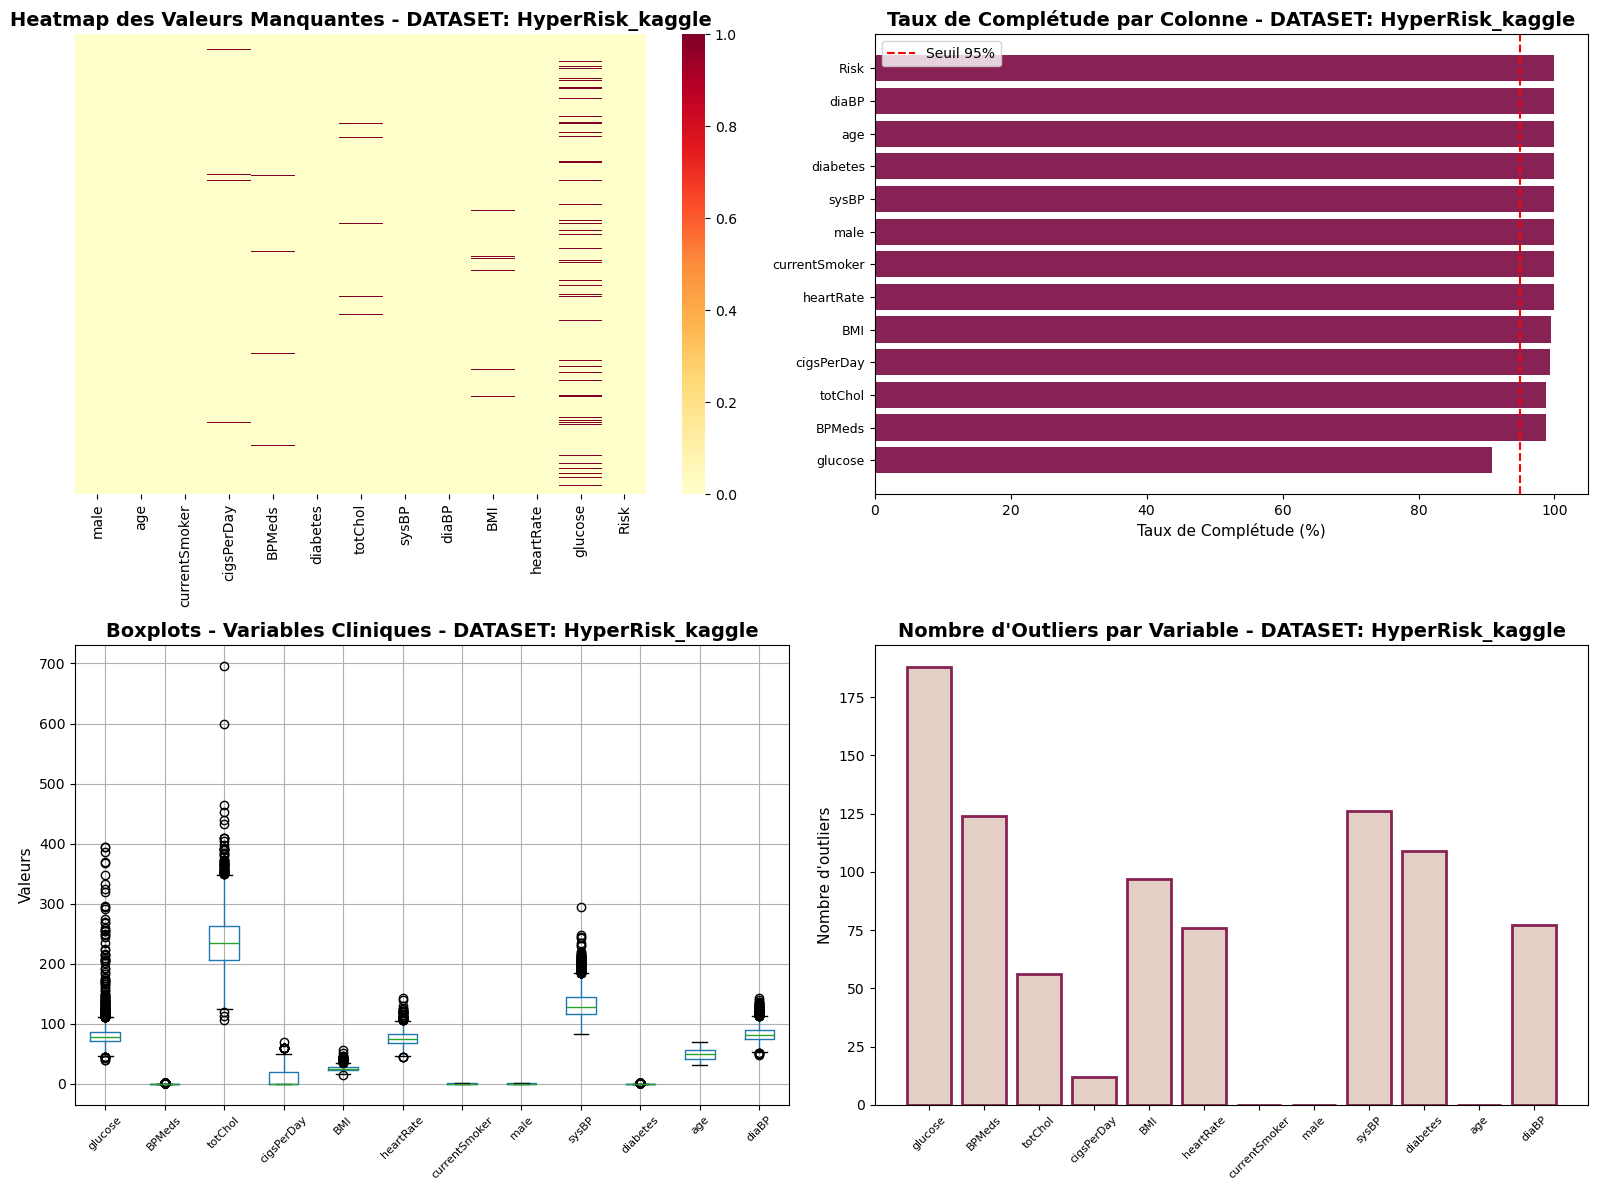

In [36]:
clinical_vars = [
  "glucose",
  "BPMeds",
  "totChol",
  "cigsPerDay",
  "BMI",
  "heartRate",
  "currentSmoker",
  "male",
  "sysBP",
  "diabetes",
  "age",
  "diaBP"
]

analyze_dataset_quality(
    HyperRisk_kaggle,
    clinical_vars=clinical_vars,
    dataset_name="DATASET: HyperRisk_kaggle",
    completeness_threshold=95
)


# 🧹 Stratégies de Nettoyage pour Dataset *HyperRisk_kaggle*

## Valeurs manquantes
- Imputer par **médiane** les variables cliniques continues avec faible taux manquant :  
  **BPMeds, totChol, cigsPerDay, BMI, heartRate** (<2%).
- Pour **glucose (~9%)** :
  - imputer par **médiane conditionnelle** (par âge ou statut diabétique si disponible), **ou**
  - créer une catégorie **glucose_missing** si utilisée comme variable clé.
- Supprimer les lignes ayant **≥ 3 variables cliniques critiques manquantes**.

## Outliers
- Vérifier la **cohérence physiologique** :
  - **glucose** (50–400 mg/dL)
  - **totChol** (100–400 mg/dL)
  - **BMI** (15–60)
  - **heartRate** (40–200 bpm)
  - **cigsPerDay** (0–100)
- Winsoriser aux **1er / 99e percentiles** pour limiter l’impact des valeurs extrêmes.
- Ajouter un indicateur binaire **is_outlier** par variable ou global.

## Types / normalisation
- Standardiser les variables numériques :  
  **glucose, totChol, BMI, heartRate, cigsPerDay**.
- Binning clinique pertinent si nécessaire  
  *(ex. glucose : normal / prédiabète / diabète)*.

## Encodage
- Vérifier et harmoniser les variables binaires  
  **(BPMeds, diabetes, smoker si présentes)** en `{0,1}`.
- Encodage ordinal cohérent pour variables de fréquence  
  *(cigsPerDay si discrétisée)*.

## Doublons / cohérences
- Supprimer les doublons (`drop_duplicates()`).
- Vérifier les règles métier simples  
  *(ex. cigsPerDay = 0 si non-fumeur)*.
- Bloquer ou corriger les valeurs impossibles avant modélisation.




In [18]:
from sklearn.preprocessing import StandardScaler

# ================= Load dataset =================
df = pd.read_csv(
  "https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/HyperRisk_kaggle.csv"
)

# ================= Missing values =================
num_vars = ["glucose", "totChol", "BMI", "heartRate", "cigsPerDay"]

for col in num_vars:
  if col in df.columns:
    df[col] = df[col].fillna(df[col].median())

if "BPMeds" in df.columns:
  df["BPMeds"] = df["BPMeds"].fillna(0)

df = df[df.isnull().sum(axis=1) < 3]

# ================= Outliers (winsorization) =================
def winsorize(series):
  low = series.quantile(0.01)
  high = series.quantile(0.99)
  return series.clip(low, high)

df["is_outlier"] = 0
for col in num_vars:
  if col in df.columns:
    before = df[col].copy()
    df[col] = winsorize(df[col])
    df.loc[before != df[col], "is_outlier"] = 1

# ================= Physiological bounds =================
bounds = {
  "glucose": (50, 400),
  "totChol": (100, 400),
  "BMI": (15, 60),
  "heartRate": (40, 200),
  "cigsPerDay": (0, 100)
}

for col, (low, high) in bounds.items():
  if col in df.columns:
    df = df[(df[col] >= low) & (df[col] <= high)]

# ================= Normalization =================
scaler = StandardScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

# ================= Remove duplicates (key columns) =================
dup_cols = ["age", "sex", "glucose", "BMI"]
dup_cols = [c for c in dup_cols if c in df.columns]

df = df.drop_duplicates(subset=dup_cols, keep="first")

# ================= Save cleaned dataset =================
df.to_csv("HyperRisk_kaggle_cleaned.csv", index=False)

print("Final shape:", df.shape)
print(df.head())

#-9 lignes apres suppression des duppliquants 
#save + next cloud + commentes le code + importation csv

Final shape: (4231, 14)
   male  age  currentSmoker  cigsPerDay  BPMeds  diabetes   totChol  sysBP  \
0     1   39              0   -0.760321     0.0         0 -0.977089  106.0   
1     0   46              0   -0.760321     0.0         0  0.322360  121.0   
2     1   48              1    0.951622     0.0         0  0.204229  127.5   
3     0   61              1    1.807594     0.0         0 -0.268298  150.0   
4     0   46              1    1.208414     0.0         0  1.149282  130.0   

   diaBP       BMI  heartRate   glucose  Risk  is_outlier  
0   70.0  0.302981   0.353571 -0.237800     0           0  
1   81.0  0.750371   1.629147 -0.300239     0           0  
2   80.0 -0.111362  -0.071621 -0.674875     0           0  
3   95.0  0.712241  -0.922005  1.385623     1           0  
4   84.0 -0.680768   0.778763  0.261715     0           0  


<h4 style="padding:10px; color:#FFF; background:#E3CFC6">2–BloodPressure_kaggle</h4>

<div style="font-size: 0.95em; margin-top: 8px;">
<strong>Note:</strong> Les variables à faible cardinalité (p. ex. <em>Physical_activity</em>) sont traitées comme catégorielles et exclues de l’analyse IQR des outliers.
 Cela évite des faux positifs liés aux règles des moustaches des boxplots sur des valeurs discrètes. L’analyse des outliers utilise les colonnes numériques
 ayant plus de 10 modalités distinctes.</div>

DATASET 2: BloodPressure_kaggle - Analyse de Qualité

❌ Valeurs manquantes par colonne:


,Colonne,Nombre_manquants,Pourcentage
0,Pregnancy,1558,77.90%
1,alcohol_consumption_per_day,242,12.10%
2,Genetic_Pedigree_Coefficient,92,4.60%



📈 Taux de complétude (table stylée):


,Colonne,Taux (%)
0,Pregnancy,22.10%
1,alcohol_consumption_per_day,87.90%
2,Genetic_Pedigree_Coefficient,95.40%
3,Blood_Pressure_Abnormality,100.00%
4,Level_of_Hemoglobin,100.00%
5,Age,100.00%
6,BMI,100.00%
7,Patient_Number,100.00%
8,Sex,100.00%
9,Smoking,100.00%



⚠️ Outliers par variable (table stylée):


,Colonne,Nombre d'outliers
0,BMI,0


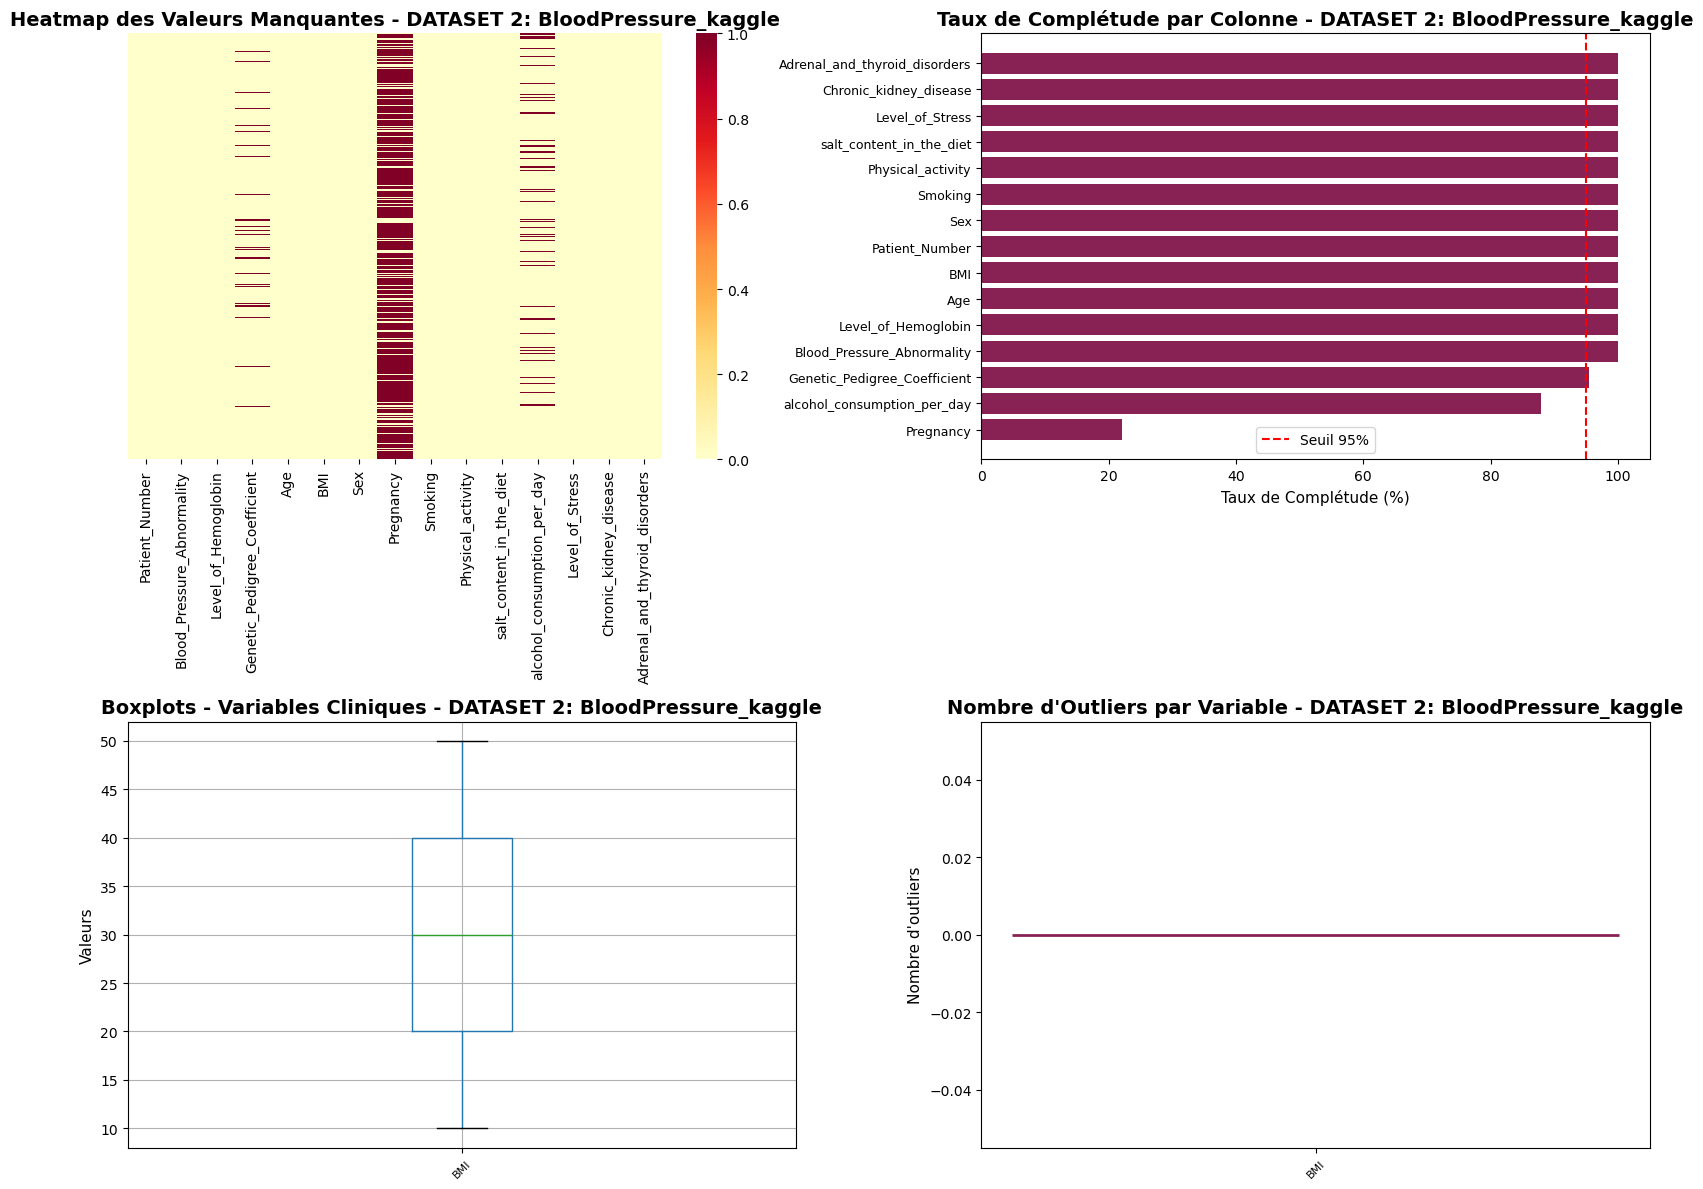

In [19]:
analyze_dataset_quality(
    BloodPressure_kaggle,
    clinical_vars=[c for c in df.select_dtypes(include=['number']).columns if df[c].nunique() > 10],
    dataset_name="DATASET 2: BloodPressure_kaggle",
    completeness_threshold=95
)

🧹 Cleaning TODO 

* Drop Pregnancy (too many missing values).

* Impute missing values in Genetic_Pedigree_Coefficient and alcohol_consumption_per_day with median.

* Investigate and cap outliers in Level_of_Hemoglobin (major issue).

* Scale skewed variables, especially salt_content_in_the_diet.

* Validate ranges (Age, BMI, alcohol ≥ 0) and logical consistency (Sex vs Pregnancy).

* Remove Patient_Number from modeling.

In [20]:
required_cols = {"Sex", "Pregnancy"}
missing = [c for c in required_cols if c not in BloodPressure_kaggle.columns]
if missing:
    print(f"Colonnes manquantes: {missing}")
else:
    before_inconsistent = int(((BloodPressure_kaggle["Sex"] == 0) & (BloodPressure_kaggle["Pregnancy"] != 0)).sum())

    BloodPressure_kaggle.loc[BloodPressure_kaggle["Sex"] == 0, "Pregnancy"] = 0

    after_inconsistent = int(((BloodPressure_kaggle["Sex"] == 0) & (BloodPressure_kaggle["Pregnancy"] != 0)).sum())

    print(f"Incohérences (Sex=0 & Pregnancy>0) avant correction: {before_inconsistent}")
    print(f"Incohérences (Sex=0 & Pregnancy>0) après correction:  {after_inconsistent}")


print(f"Valeurs manquantes = {BloodPressure_kaggle['Pregnancy'].isna().sum()}")

Incohérences (Sex=0 & Pregnancy>0) avant correction: 1008
Incohérences (Sex=0 & Pregnancy>0) après correction:  0
Valeurs manquantes = 550


In [21]:
df=BloodPressure_kaggle.copy()

df.drop(columns=["Pregnancy","Patient_Number"],errors="ignore",inplace=True)

num_cols=["Level_of_Hemoglobin","Genetic_Pedigree_Coefficient",
          "alcohol_consumption_per_day","salt_content_in_the_diet",
          "Age","BMI","Level_of_Stress"]

df[num_cols]=df[num_cols].apply(lambda c:c.fillna(c.median()))

df["Level_of_Hemoglobin"]=cap_iqr(df["Level_of_Hemoglobin"])

df["salt_content_in_the_diet"]=np.log1p(df["salt_content_in_the_diet"])

df=df[(df["Age"]>0)&(df["BMI"]>0)&(df["alcohol_consumption_per_day"]>=0)]

BloodPressure_kaggle = df


DATASET 2: BloodPressure_kaggle - Analyse de Qualité

❌ Valeurs manquantes par colonne:
Aucune valeur manquante détectée ✅

📈 Taux de complétude (table stylée):


,Colonne,Taux (%)
0,Blood_Pressure_Abnormality,100.00%
1,Level_of_Hemoglobin,100.00%
2,Genetic_Pedigree_Coefficient,100.00%
3,Age,100.00%
4,BMI,100.00%
5,Sex,100.00%
6,Smoking,100.00%
7,Physical_activity,100.00%
8,salt_content_in_the_diet,100.00%
9,alcohol_consumption_per_day,100.00%



⚠️ Outliers par variable (table stylée):


,Colonne,Nombre d'outliers
0,salt_content_in_the_diet,90
1,Genetic_Pedigree_Coefficient,0
2,Level_of_Hemoglobin,0
3,Age,0
4,BMI,0
5,Physical_activity,0
6,alcohol_consumption_per_day,0


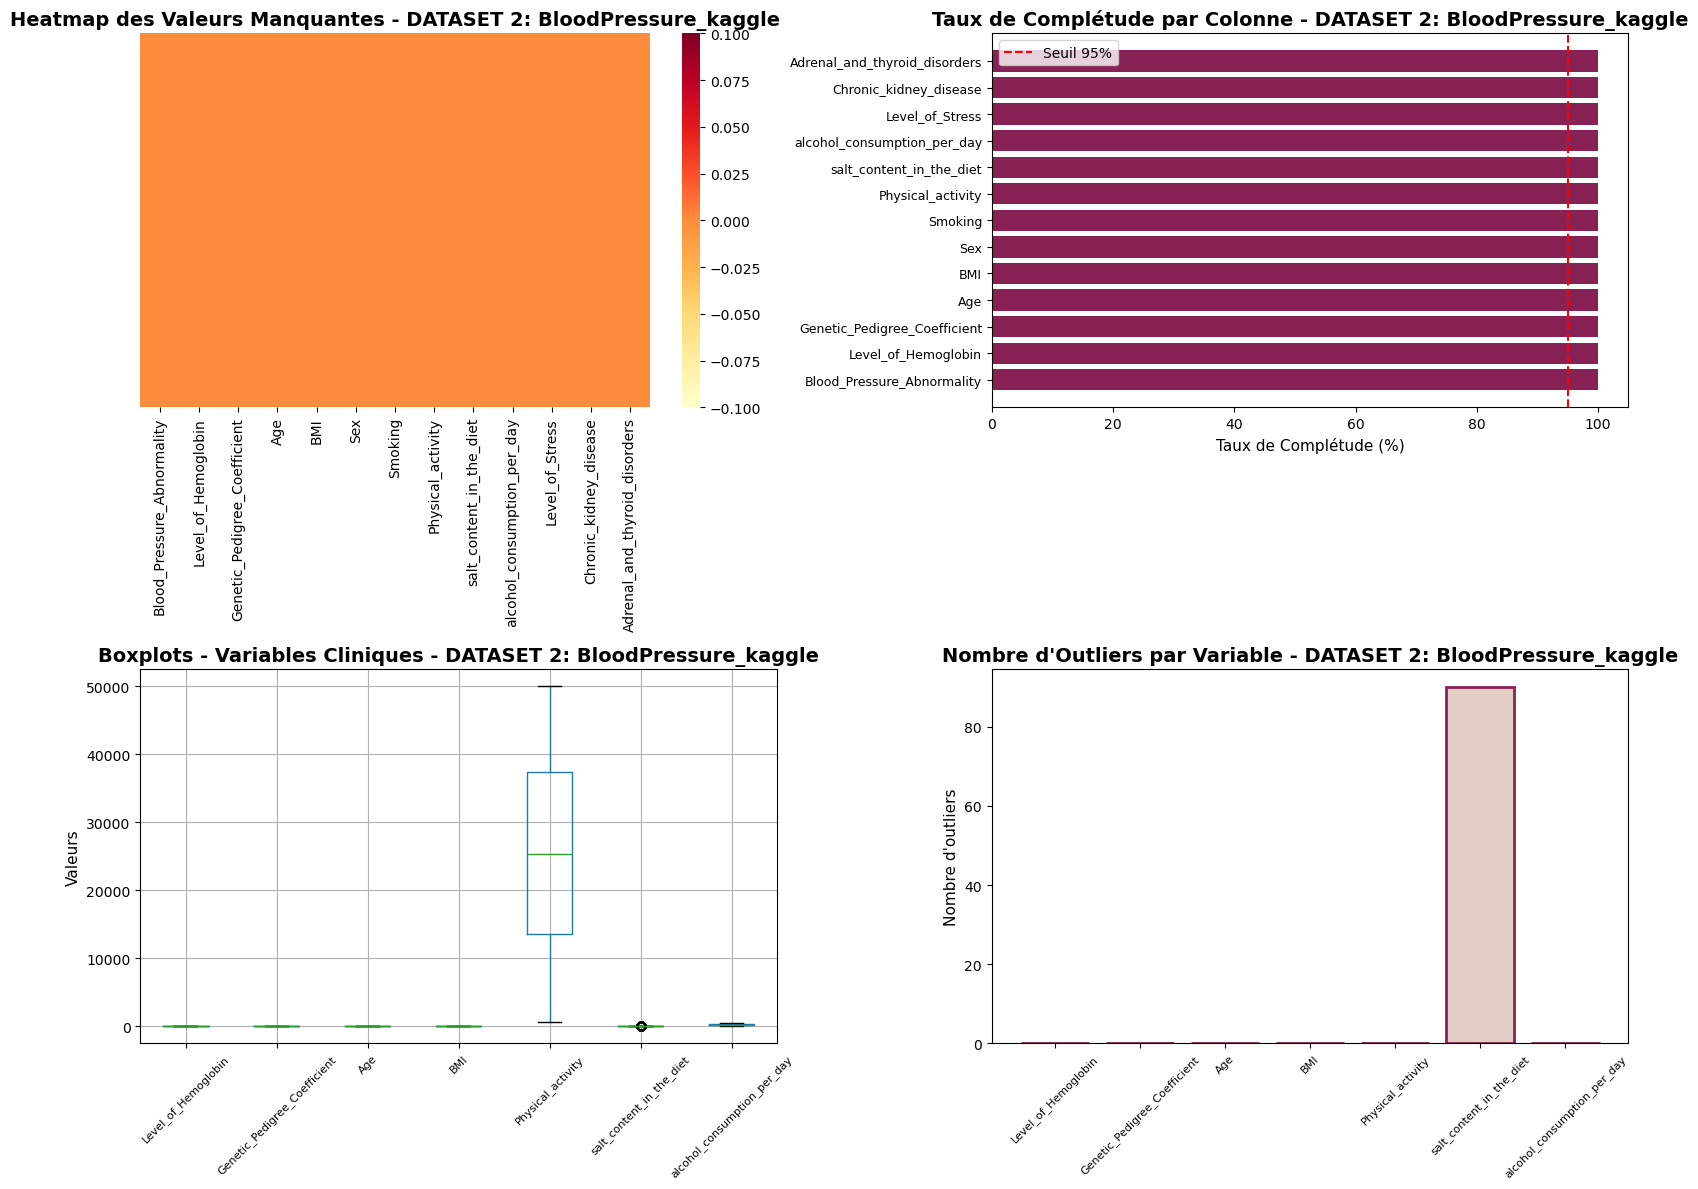

In [22]:
analyze_dataset_quality(
    df,
    clinical_vars=[c for c in df.select_dtypes(include=['number']).columns if df[c].nunique() > 10],
    dataset_name="DATASET 2: BloodPressure_kaggle",
    completeness_threshold=95,
    outlier_detector=mixed_outlier_detector
)

<h4 style="padding:10px; color:#FFF; background:#E3CFC6">3–BloodValues_kaggle</h4>

DATASET 3: BloodValues_kaggle - Analyse de Qualité

❌ Valeurs manquantes par colonne:
Aucune valeur manquante détectée ✅

📈 Taux de complétude (table stylée):


,Colonne,Taux (%)
0,"Gender (0:Female, 1: Male)",100.00%
1,Age,100.00%
2,Glucose (fasting),100.00%
3,AST (Aspartat Aminotransferaz),100.00%
4,ALT (Alanin Aminotransferaz),100.00%
5,Creatinine,100.00%
6,blood urea nitrogen (BUN),100.00%
7,blood urea nitrogen - [ÜRE],100.00%
8,Thyroid Stimulating Hormone (TSH),100.00%
9,Triglyceride,100.00%



⚠️ Outliers par variable (table stylée):


,Colonne,Nombre d'outliers
0,Glucose (fasting),410
1,ALT (Alanin Aminotransferaz),364
2,Creatinine,300
3,AST (Aspartat Aminotransferaz),271
4,Thyroid Stimulating Hormone (TSH),271
5,Triglyceride,243
6,blood urea nitrogen - [ÜRE],168
7,blood urea nitrogen (BUN),168
8,Free T4 (FT4),140
9,High Density Lipoprotein (HDL Cholesterol),89


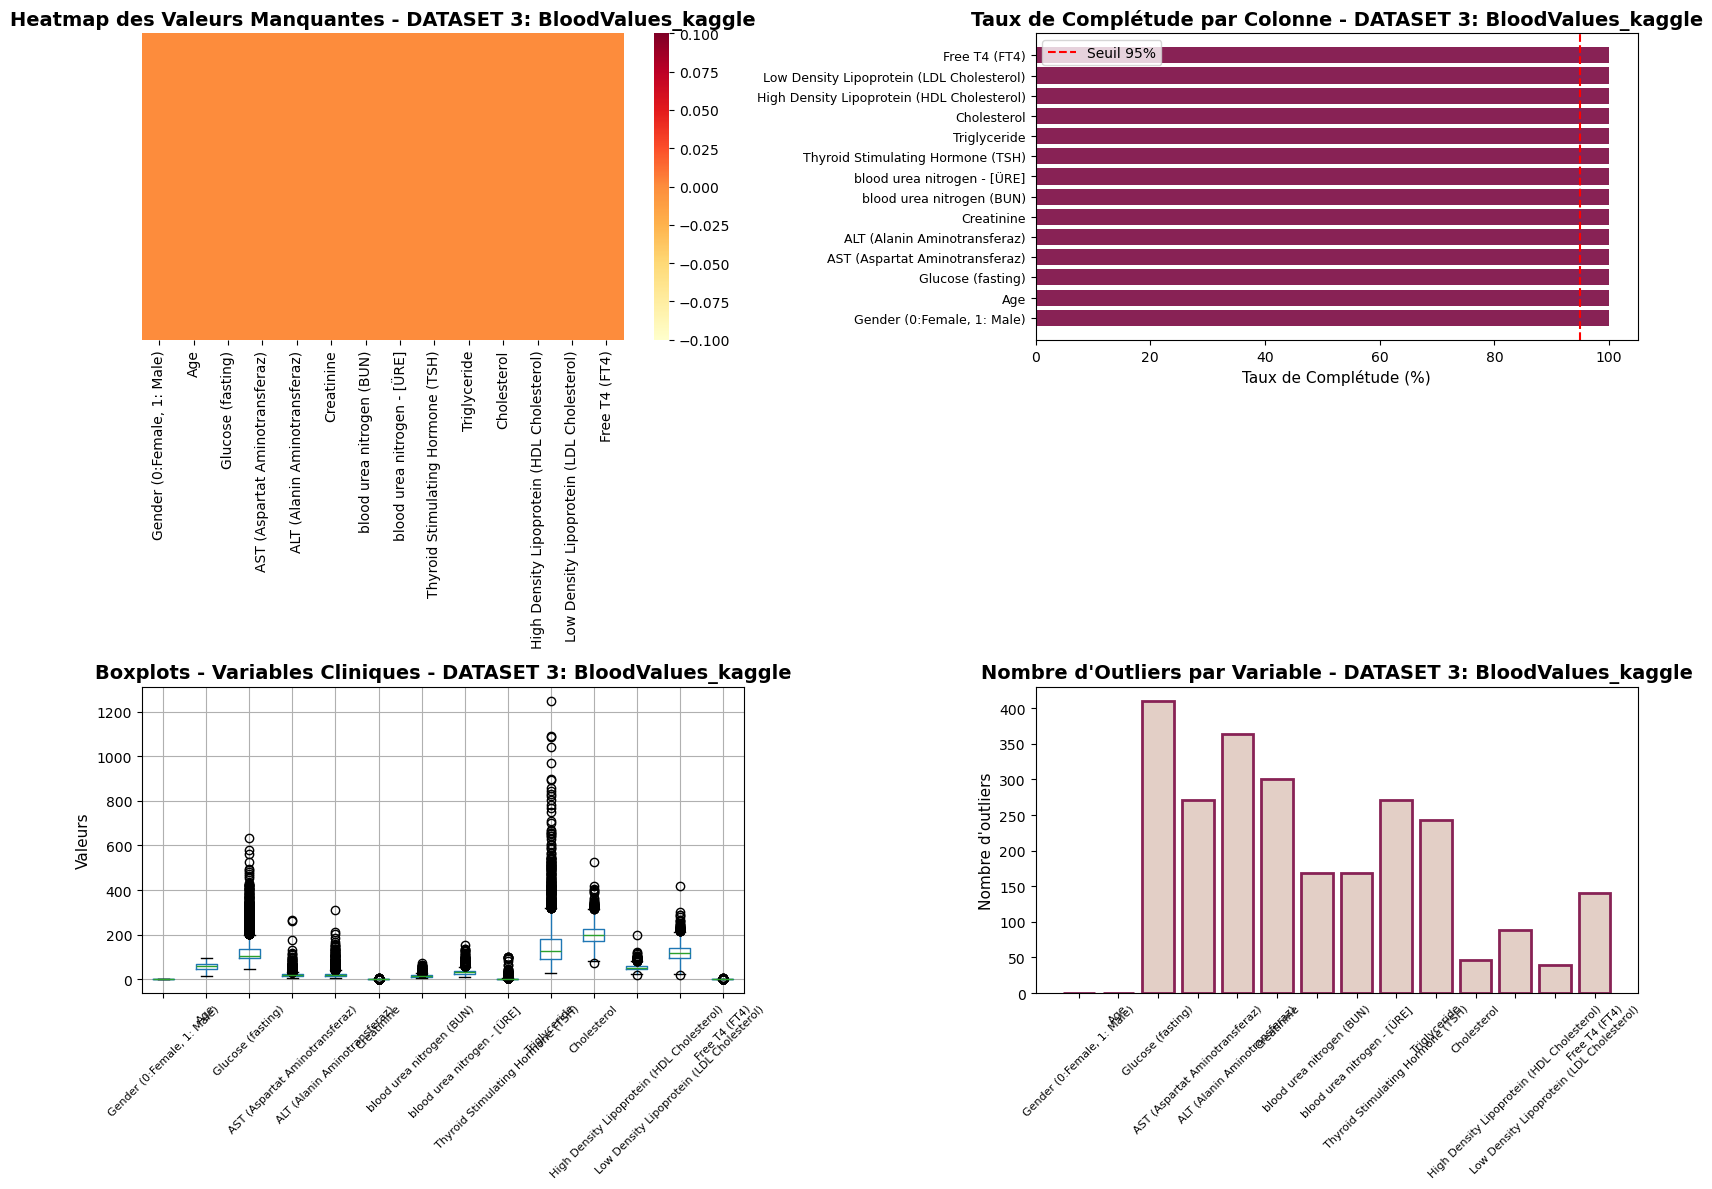

In [23]:
clinical_vars = ["WBC", "RBC", "Hemoglobin", "Hematocrit", "Platelets", "MCV", "MCH", "MCHC"]

analyze_dataset_quality(
    BloodValues_kaggle,
    clinical_vars=None,
    # clinical_vars=clinical_vars,
    dataset_name="DATASET 3: BloodValues_kaggle",
    completeness_threshold=95
)

<h4 style="padding:10px; color:#FFF; background:#E3CFC6">5–BloodDonation_kaggle</h4>

DATASET 3: BloodDonation_kaggle - Analyse de Qualité

❌ Valeurs manquantes par colonne:


,Colonne,Nombre_manquants,Pourcentage
0,Medical_Condition,7805,78.05%



📈 Taux de complétude (table stylée):


,Colonne,Taux (%)
0,Medical_Condition,21.95%
1,Donor_ID,100.00%
2,Gender,100.00%
3,Full_Name,100.00%
4,Blood_Group,100.00%
5,Contact_Number,100.00%
6,Email,100.00%
7,Age,100.00%
8,City,100.00%
9,State,100.00%



⚠️ Outliers par variable (table stylée):


,Colonne,Nombre d'outliers
0,Total_Donations,49
1,Age,42
2,Hemoglobin_g_dL,28
3,Weight_kg,27
4,Contact_Number,0


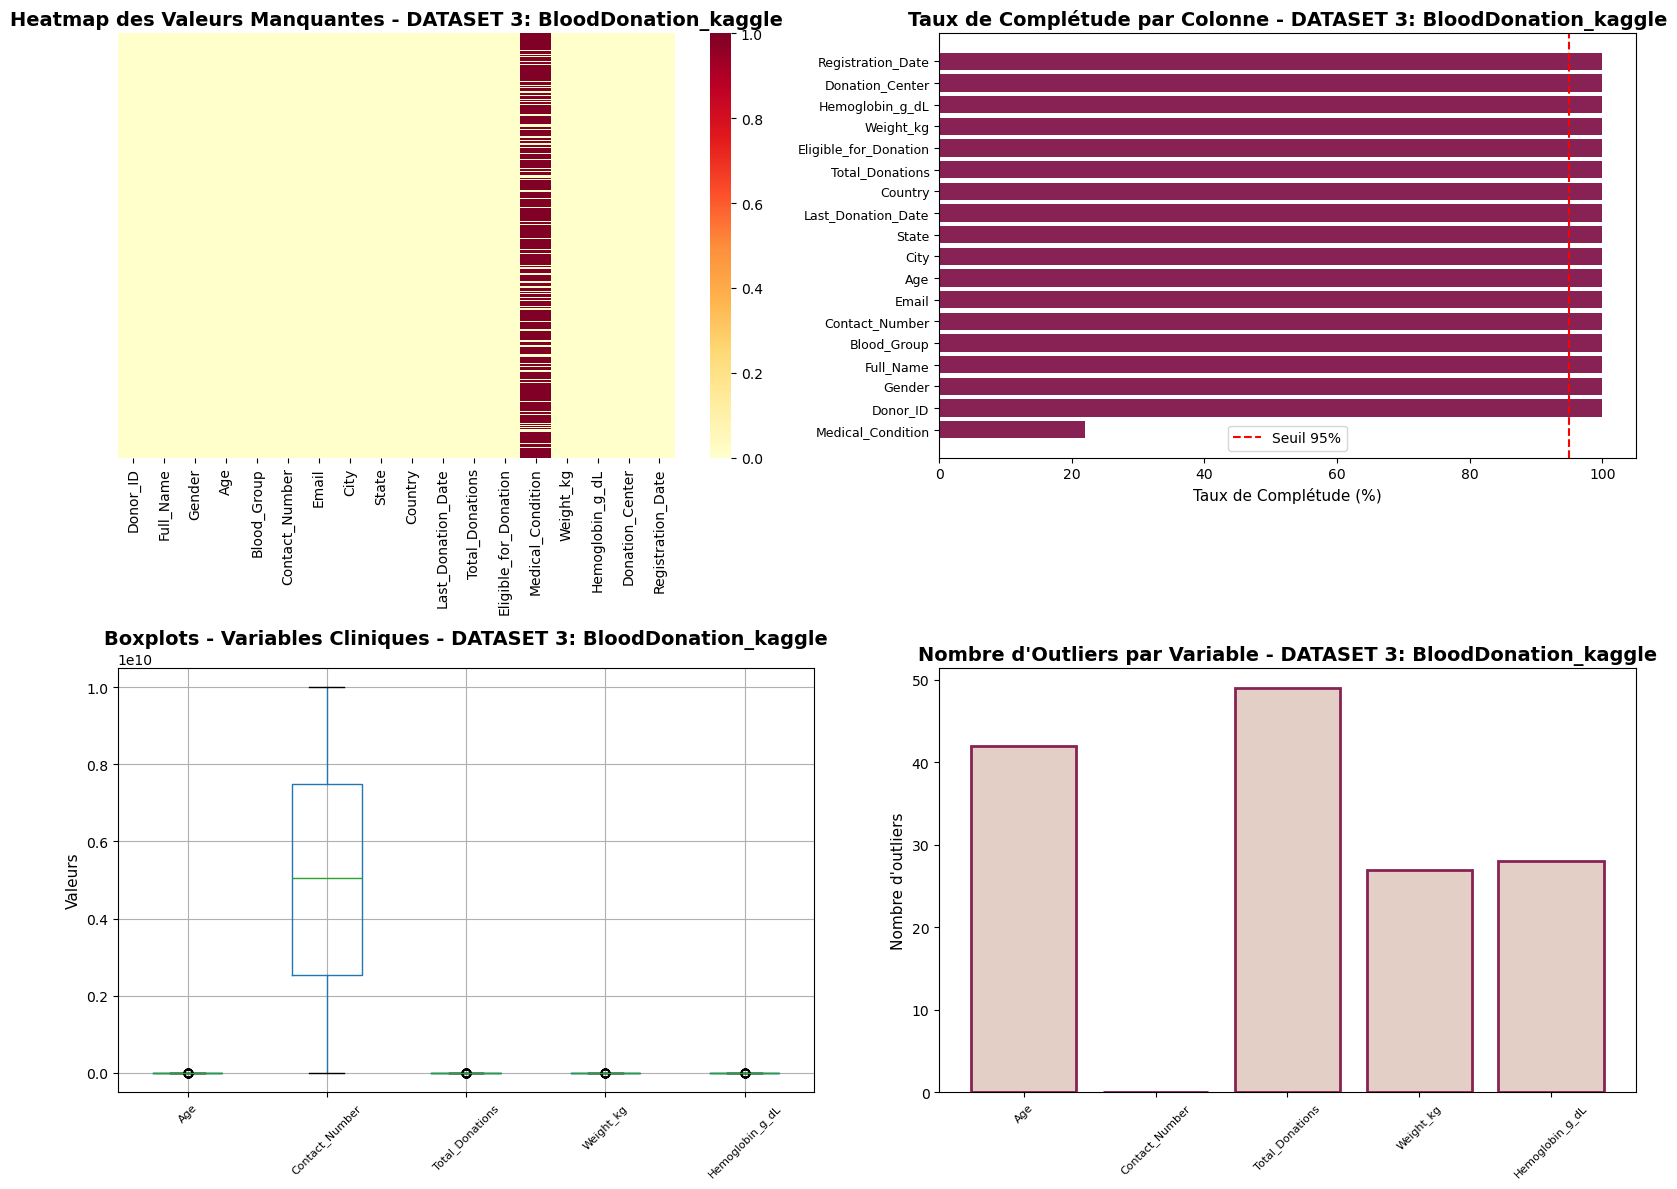

In [24]:
analyze_dataset_quality(
    BloodDonation_kaggle,
    clinical_vars=None,
    dataset_name="DATASET 3: BloodDonation_kaggle",
    completeness_threshold=95
)

🧹 Cleaning TODO

* No missing values detected → no imputation needed (rare W).

* Drop or mask identifiers: Donor_ID, Full_Name, Email, Contact_Number, Last_Donation_Date, Donation_Center, Medical_Condition (privacy + no signal).

* Treat Contact_Number as categorical/ID, not numeric (boxplot chaos = expected).

* Handle outliers in Age, Total_Donations, Weight_kg, Hemoglobin_g_dL (IQR capping or winsorization).

* Validate biological ranges (Age, Weight_kg, Hemoglobin_g_dL).

* Parse dates (Registration_Date, Last_Donation_Date) → derive features if needed.

* Encode categorical vars (Blood_Group, Gender).

In [25]:
df=BloodDonation_kaggle

df.drop(columns=["Donor_ID","Full_Name","Email","Contact_Number","Last_Donation_Date","Donation_Center","Medical_Condition"],inplace=True)

df["Gender"]=df["Gender"].map({"Male":1,"Female":0})

df["Eligible_for_Donation"]=df["Eligible_for_Donation"].map({"Yes":1,"No":0})

df["Registration_Date"]=pd.to_datetime(df["Registration_Date"],dayfirst=True, errors="coerce")

df=df[(df["Age"].between(18,65))&(df["Weight_kg"].between(40,150))]

df=df[df["Hemoglobin_g_dL"].between(10,20)]

for c in ["Age","Total_Donations","Weight_kg","Hemoglobin_g_dL"]:
  df[c]=cap_iqr(df[c])

df=pd.get_dummies(df,columns=["Blood_Group"],
                   drop_first=True)

BloodDonation_kaggle = df

DATASET 3: BloodDonation_kaggle - Analyse de Qualité

❌ Valeurs manquantes par colonne:


,Colonne,Nombre_manquants,Pourcentage
0,Gender,108,1.08%



📈 Taux de complétude (table stylée):


,Colonne,Taux (%)
0,Gender,98.92%
1,Age,100.00%
2,City,100.00%
3,State,100.00%
4,Country,100.00%
5,Total_Donations,100.00%
6,Eligible_for_Donation,100.00%
7,Weight_kg,100.00%
8,Hemoglobin_g_dL,100.00%
9,Registration_Date,100.00%



⚠️ Outliers par variable (table stylée):


,Colonne,Nombre d'outliers
0,Gender,0
1,Age,0
2,Total_Donations,0
3,Eligible_for_Donation,0
4,Weight_kg,0
5,Hemoglobin_g_dL,0


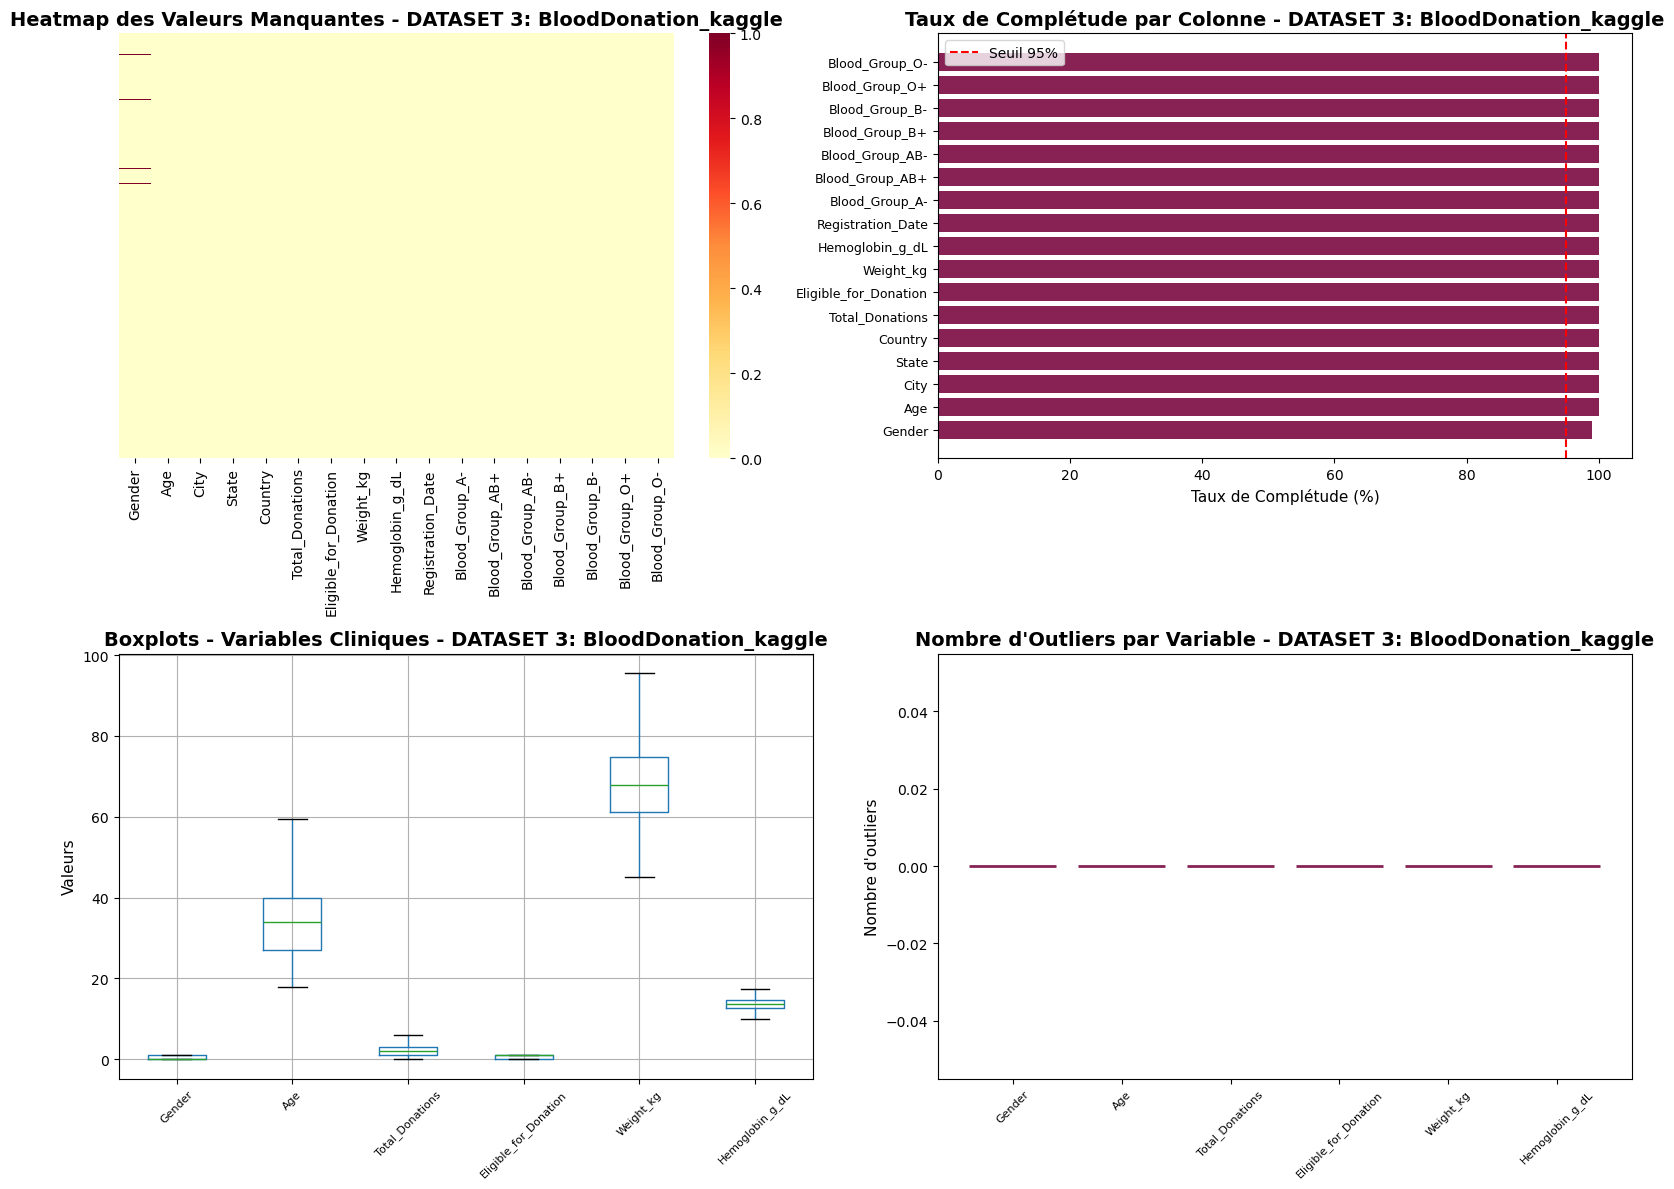

In [26]:
analyze_dataset_quality(
    BloodDonation_kaggle,
    clinical_vars=None,
    dataset_name="DATASET 3: BloodDonation_kaggle",
    completeness_threshold=95
)

---

<h2 style="padding:10px; color:#FFF; background:#882255">PHASE 2 : ANALYSES DESCRIPTIVES</h2>

<h3 style="color:#882255">Section 2.1 : Profils Démographiques des Donneurs</h3>

**📊 Datasets utilisés :** 5 (BloodDonation_kaggle)

**Visualisations :**
- Pyramide des âges (histogramme groupé par sexe)
- Graphiques en secteurs pour la distribution des groupes sanguins
- Barplots des conditions médicales préexistantes
- Distributions des intervalles entre dons (violin plots)

**❓ Questions :**
- Quelle est la répartition âge/sexe des donneurs ?
- Quelles sont les conditions médicales les plus fréquentes ?
- Quel est le profil type du donneur régulier vs occasionnel ?


<h3 style="color:#882255">Section 2.2 : Distribution de la Pression Artérielle</h3>

**📊 Datasets utilisés :** 2 (BloodPressure_kaggle)

**Visualisations :**
- Histogrammes de distribution (systolique et diastolique)
- Scatter plot systolique vs diastolique avec zones de classification (normale/élevée/hypertension)
- KDE plots pour comparer les distributions par sexe et par tranche d'âge
- Boxplots par catégories démographiques

**❓ Questions :**
- Quelle est la distribution normale de la pression artérielle dans la population ?
- Comment définir les seuils de risque (hypotension, préhypertension, hypertension) ?
- Y a-t-il des différences significatives entre hommes et femmes ?


<h3 style="color:#882255">Section 2.3 : Paramètres Biologiques Sanguins</h3>

**📊 Datasets utilisés :** 3 (BloodValues_kaggle)

**Visualisations :**
- Matrice de corrélation (heatmap) entre tous les paramètres biologiques
- Pairplot des variables principales (hémoglobine, glucose, cholestérol)
- Distributions univariées pour chaque biomarqueur
- Radar charts pour profiler des groupes de patients

**❓ Questions :**
- Quelles sont les valeurs normales vs pathologiques des biomarqueurs ?
- Existe-t-il des corrélations fortes entre certains paramètres sanguins ?
- Peut-on identifier des profils biologiques distincts ?


---

<h2 style="padding:10px; color:#FFF; background:#882255">PHASE 3 : ANALYSES GÉOGRAPHIQUES</h2>



<h3 style="color:#882255">Section 3.1 : Cartographie de la Distribution des Groupes Sanguins</h3>

**📊 Datasets utilisés :** 4 (BloodGroupWW_kaggle)

**Visualisations :**
- Choropleth map mondiale (plotly/geopandas) pour chaque groupe sanguin (A, B, AB, O)
- Heatmap comparative des pourcentages par pays
- Barplots horizontaux des top 10 pays par groupe sanguin
- Stacked bar charts pour visualiser la composition globale par région

**❓ Questions :**
- Quelles régions du monde ont des prédominances spécifiques (ex: O+ en Europe, B+ en Asie) ?
- Où se situent les zones de pénurie potentielle pour les groupes rares (AB-, O-) ?
- Y a-t-il des patterns géographiques liés à l'évolution ou aux migrations ?

<h3 style="color:#882255">Section 3.2 : Prévalence de l'Hypertension en Inde</h3>

**📊 Datasets utilisés :** 6 (BloodIndia_gouv)

**Visualisations :**
- Choropleth map de l'Inde colorée par taux d'hypertension
- Barplots comparatifs entre États pour hypertension, diabète, obésité
- Scatter plot : hypertension vs obésité (corrélation régionale)
- Heatmap des 4 indicateurs (hypertension, glucose élevé, obésité, surpoids) par État

**❓ Questions :**
- Quels États indiens présentent les taux d'hypertension les plus élevés ?
- Existe-t-il une corrélation régionale entre hypertension et obésité/diabète ?
- Quelles zones nécessitent des campagnes de prévention prioritaires ?


---

<h2 style="padding:10px; color:#FFF; background:#882255">PHASE 4 : ANALYSES STATISTIQUES & CORRÉLATIONS</h2>

<h3 style="color:#882255">Section 4.1 : Facteurs de Risque de l'Hypertension</h3>

**📊 Datasets utilisés :** 1 (HyperRisk_kaggle) + 2 (BloodPressure_kaggle) + 3 (BloodValues_kaggle)

**Visualisations :**
- Matrice de corrélation entre BP et paramètres cliniques (âge, BMI, glucose, cholestérol)
- Boxplots de BP par catégorie (âge, sexe, habitudes de vie)
- Partial dependence plots pour isoler l'effet de chaque variable
- Violin plots stratifiés

**Tests statistiques :**
- Corrélations de Pearson/Spearman
- Tests t de Student (comparaison groupes)
- ANOVA (comparaison multiple)
- Chi² pour variables catégorielles

**❓ Questions :**
- Quels facteurs sont les plus corrélés à l'hypertension (âge, sexe, glucose, cholestérol) ?
- L'IMC et le glucose sont-ils des prédicteurs indépendants ?
- Y a-t-il des interactions significatives entre variables ?

<h3 style="color:#882255">Section 4.2 : Prédiction du Risque de Don</h3>

**📊 Datasets utilisés :** 1 + 2 + 3 + 5 (fusion intelligente)

**Visualisations :**
- Feature importance plots (Random Forest, XGBoost)
- SHAP values pour l'interprétabilité
- Confusion matrix et ROC curves
- Calibration plots

**Tests statistiques :**
- Régression logistique (odds ratios)
- Tests de significativité des coefficients

**❓ Questions :**
- Peut-on établir un score de risque combinant âge, BP, biomarqueurs et historique de dons ?
- Quels sont les seuils d'alerte cliniques pour refuser un don ?
- Quelles variables sont les plus prédictives d'une complication post-don ?

---

<h2 style="padding:10px; color:#FFF; background:#882255">PHASE 5 : MODÉLISATION PRÉDICTIVE</h2>



<h3 style="color:#882255">Section 5.1 : Classification des Profils à Risque</h3>

**📊 Datasets utilisés :** 1 + 2 + 3 + 5 (dataset intégré)

**Modèles :**
- Régression logistique (baseline)
- Random Forest Classifier
- XGBoost Classifier
- SVM (optionnel)

**Visualisations :**
- Confusion matrices comparatives
- ROC curves multi-modèles (AUC)
- Precision-Recall curves
- Feature importance rankings
- Learning curves (validation croisée)

**Métriques :**
- Accuracy, Precision, Recall, F1-Score
- AUC-ROC
- Validation croisée (K-fold)

**❓ Questions :**
- Peut-on classifier automatiquement les donneurs en "risque faible/moyen/élevé" ?
- Quel modèle offre le meilleur compromis performance/interprétabilité ?
- Quelles features sont les plus discriminantes ?


<h3 style="color:#882255">Section 5.2 : Régression de la Pression Artérielle</h3>

**📊 Datasets utilisés :** 2 + 3 (BP + biomarqueurs)

**Modèles :**
- Régression linéaire multiple
- Ridge/Lasso Regression
- Random Forest Regressor
- XGBoost Regressor

**Visualisations :**
- Scatter plots : valeurs prédites vs réelles
- Residual plots
- Feature importance
- Partial dependence plots

**Métriques :**
- RMSE, MAE, R²
- Validation croisée

**❓ Questions :**
- Peut-on prédire la BP systolique/diastolique à partir des biomarqueurs ?
- Quelle est la précision de la prédiction (intervalle de confiance) ?
- Quelles variables biologiques ont l'impact le plus fort sur la BP ?


<h3 style="color:#882255">Section 5.3 : Segmentation des Donneurs (Clustering)</h3>

**📊 Datasets utilisés :** 5 (BloodDonation_kaggle)

**Modèles :**
- K-Means
- DBSCAN
- Hierarchical Clustering

**Visualisations :**
- Elbow plot (nombre optimal de clusters)
- PCA/t-SNE pour visualisation 2D/3D des clusters
- Radar charts des profils moyens par cluster
- Silhouette plots

**❓ Questions :**
- Peut-on identifier des segments naturels de donneurs (réguliers, occasionnels, à risque) ?
- Quelles sont les caractéristiques dominantes de chaque cluster ?
- Comment adapter les campagnes de don par segment ?


---

<h2 style="padding:10px; color:#FFF; background:#882255">PHASE 6 : COMPUTER VISION </h2>

<h3 style="color:#882255">Section 6.1 : Classification des Cellules Sanguines</h3>

**📊 Datasets utilisés :** 7 (BCCD_github)

**Approches :**
- Extraction de features (couleur, forme, texture)
- Classification traditionnelle (SVM, Random Forest sur features extraites)
- CNN (TensorFlow/Keras) si ressources disponibles

**Visualisations :**
- Grilles d'images annotées par type cellulaire
- Confusion matrix (RBC, WBC, Platelets)
- Grad-CAM pour visualiser les zones d'attention du CNN
- Distribution des classes

**❓ Questions :**
- Peut-on automatiser la classification des types cellulaires ?
- Quelle précision atteint-on avec des méthodes classiques vs deep learning ?
- Les anomalies cellulaires sont-elles détectables visuellement ?

In [27]:
# Define BASE_URL explicitly for fallback crawler in Cell 48
BASE_URL = "https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/BCCD_github/"

# Ensure image extensions are available for link filtering
if "IMG_EXTS" not in globals():
    IMG_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"}

In [28]:
# 6.1 (Alternative) – Lazy HTTP dataset with on-disk cache (no bulk download required)
# This cell lets you train directly from URLs. Files are cached on first use.



# Optional imports for ML frameworks
try:
    import torch
    from torch.utils.data import DataLoader
except Exception:
    torch = None

try:
    import torchvision.transforms as T
except Exception:
    T = None

try:
    from PIL import Image
except Exception:
    Image = None

# Reuse session if defined by the crawler cell
_http = globals().get("SESSION") or globals().get("session") or requests.Session()

CACHE_DIR = Path("DATA/BCCD_github_cache").resolve()
CACHE_DIR.mkdir(parents=True, exist_ok=True)


def _cache_path(url: str) -> Path:
    h = hashlib.sha1(url.encode()).hexdigest()
    ext = os.path.splitext(url)[1] or ".bin"
    return CACHE_DIR / f"{h}{ext}"


class URLImageDataset:
    """Generic URL-backed image dataset with local cache.
    - urls: list of image URLs
    - transform: optional transform (torchvision compatible). If None, returns PIL images.
    """
    def __init__(self, urls, transform=None, session=None):
        self.urls = list(urls)
        self.transform = transform
        self.session = session or _http

        if Image is None:
            raise RuntimeError("Pillow (PIL) is required: pip install pillow")

    def __len__(self):
        return len(self.urls)

    def __getitem__(self, idx):
        url = self.urls[idx]
        dest = _cache_path(url)
        if not dest.exists():
            r = self.session.get(url, timeout=60)
            r.raise_for_status()
            dest.write_bytes(r.content)
        img = Image.open(dest).convert("RGB")
        if self.transform is not None:
            return self.transform(img)
        return img


# Fallback lightweight crawler if URLs are not yet available

def _fallback_list_image_urls(base_url: str):
    try:
        from bs4 import BeautifulSoup
    except Exception:
        import sys, subprocess
        subprocess.check_call([sys.executable, "-m", "pip", "install", "beautifulsoup4"])  # install bs4
        from bs4 import BeautifulSoup

    visited = set()
    links = []
    netloc = urlparse(base_url).netloc
    base_path = urlparse(base_url).path.rstrip('/')
    IMG_EXTS_LOCAL = set(globals().get("IMG_EXTS", {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"}))

    def is_ok(u: str) -> bool:
        pu = urlparse(u)
        return pu.scheme in ("http", "https") and pu.netloc == netloc and pu.path.startswith(base_path)

    def crawl(u: str):
        if u in visited:
            return
        visited.add(u)
        try:
            resp = _http.get(u, timeout=30)
            resp.raise_for_status()
        except Exception:
            return
        soup = BeautifulSoup(resp.text, "html.parser")
        for a in soup.find_all("a", href=True):
            full = urljoin(u, a["href"])
            if not is_ok(full):
                continue
            if full.endswith("/"):
                crawl(full)
            else:
                ext = Path(urlparse(full).path).suffix.lower()
                if ext in IMG_EXTS_LOCAL:
                    links.append(full)

    crawl(base_url)
    # Expose collected links to globals for reuse by other cells
    globals()["file_links"] = {"image": links}
    return links


def gather_remote_image_urls():
    """Use URLs discovered by previous cells; otherwise perform a quick crawl."""
    if "paired_stems" in globals() and "images_by_stem" in globals() and globals()["paired_stems"]:
        return [globals()["images_by_stem"][s][0] for s in globals()["paired_stems"]]
    if "file_links" in globals() and globals()["file_links"].get("image"):
        return list(globals()["file_links"].get("image", []))
    if "BASE_URL" in globals():
        print("No URLs found in memory; performing a quick crawl of BASE_URL...")
        return _fallback_list_image_urls(globals()["BASE_URL"])
    raise RuntimeError("No URLs found. Run the 6.1 crawl cell first to populate URLs or define BASE_URL.")


# Build URL list from the crawler outputs or fallback crawl
urls = gather_remote_image_urls()
print(f"Discovered {len(urls)} image URLs for lazy loading.")

# Example: PyTorch DataLoader (only if torch is available)
if torch is not None:
    # If torchvision is available, apply a tensor transform; otherwise keep PIL
    collate_fn = None
    transform = None
    if T is not None:
        transform = T.Compose([
            T.Resize((256, 256)),
            T.ToTensor(),
        ])
    else:
        # Avoid default_collate errors with PIL images by returning the batch as-is
        collate_fn = lambda batch: batch

    ds = URLImageDataset(urls, transform=transform, session=_http)
    try:
        dl = DataLoader(ds, batch_size=16, shuffle=True, num_workers=2, collate_fn=collate_fn)
        batch = next(iter(dl))  # triggers lazy fetch + cache
        if T is not None and hasattr(batch, "shape"):
            print("Loaded a tensor batch with shape:", batch.shape)
        else:
            # batch is likely a list of PIL Images
            print(f"Loaded a batch of {len(batch)} items (PIL images or non-tensor).")
    except Exception as e:
        print("DataLoader demo skipped:", e)
else:
    print("PyTorch not installed. You can still use URLImageDataset directly to iterate PIL images.")
    print("Install with: pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu")

# Notes:
# - Files are cached to DATA/BCCD_github_cache on first access.
# - This avoids bulk download while keeping subsequent epochs fast.
# - To clear cache: delete the DATA/BCCD_github_cache directory.


No URLs found in memory; performing a quick crawl of BASE_URL...
Discovered 366 image URLs for lazy loading.
DataLoader demo skipped: Caught SSLError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/local/stow/conda/miniforge3/envs/cremi/lib/python3.12/site-packages/urllib3/response.py", line 779, in _error_catcher
    yield
  File "/opt/local/stow/conda/miniforge3/envs/cremi/lib/python3.12/site-packages/urllib3/response.py", line 904, in _raw_read
    data = self._fp_read(amt, read1=read1) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/local/stow/conda/miniforge3/envs/cremi/lib/python3.12/site-packages/urllib3/response.py", line 887, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "/opt/local/stow/conda/miniforge3/envs/cremi/lib/python3.12/http/client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "/opt/loc

In [29]:
# 6.1 – Build annotated patch dataset from XML (RBC/WBC/Platelets)
# Parses Pascal VOC XMLs, crops per-object patches, prepares records.

# Reuse cache helpers (from lazy-cache cell); define if missing
if "CACHE_DIR" not in globals():
    CACHE_DIR = Path("DATA/BCCD_github_cache").resolve()
    CACHE_DIR.mkdir(parents=True, exist_ok=True)
if "_http" not in globals():
    import requests
    _http = requests.Session()
if "_cache_path" not in globals():
    import os, hashlib
    def _cache_path(url: str) -> Path:
        h = hashlib.sha1(url.encode()).hexdigest()
        ext = os.path.splitext(url)[1] or ".bin"
        return CACHE_DIR / f"{h}{ext}"


def fetch_to_cache(url: str) -> Path:
    p = _cache_path(url)
    if not p.exists():
        r = _http.get(url, timeout=60)
        r.raise_for_status()
        p.write_bytes(r.content)
    return p


# Reuse URL mappings from crawler; fallback to BASE_URL crawl if missing
def _build_mappings_from_base(base_url: str):
    from bs4 import BeautifulSoup
    visited = set(); image_urls = []; xml_urls = []
    netloc = urlparse(base_url).netloc
    base_path = urlparse(base_url).path.rstrip('/')
    IMG_EXTS_LOCAL = set(globals().get("IMG_EXTS", {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"}))
    def is_ok(u: str) -> bool:
        pu = urlparse(u)
        return pu.scheme in ("http", "https") and pu.netloc == netloc and pu.path.startswith(base_path)
    def crawl(u: str):
        if u in visited:
            return
        visited.add(u)
        resp = _http.get(u, timeout=30)
        try:
            resp.raise_for_status()
        except Exception:
            return
        soup = BeautifulSoup(resp.text, "html.parser")
        for a in soup.find_all("a", href=True):
            full = urljoin(u, a["href"])
            if not is_ok(full):
                continue
            if full.endswith("/"):
                crawl(full)
            else:
                ext = Path(urlparse(full).path).suffix.lower()
                if ext in IMG_EXTS_LOCAL:
                    image_urls.append(full)
                if ext == ".xml":
                    xml_urls.append(full)
    crawl(base_url)
    imgs_by_stem = {}
    xmls_by_stem = {}
    for u in image_urls:
        stem = Path(urlparse(u).path).stem
        imgs_by_stem.setdefault(stem, []).append(u)
    for u in xml_urls:
        stem = Path(urlparse(u).path).stem
        xmls_by_stem.setdefault(stem, []).append(u)
    globals()["images_by_stem"] = imgs_by_stem
    globals()["xml_by_stem"] = xmls_by_stem

if "images_by_stem" not in globals() or "xml_by_stem" not in globals():
    if "BASE_URL" in globals():
        _build_mappings_from_base(globals()["BASE_URL"])
    else:
        raise RuntimeError("Define BASE_URL or run the crawl/downloader cell to populate images_by_stem/xml_by_stem.")

LABELS = ["RBC", "WBC", "Platelets"]


def parse_voc_xml(xml_path: Path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    objs = []
    for obj in root.findall("object"):
        name = obj.findtext("name")
        bnd = obj.find("bndbox")
        if bnd is None:
            continue
        try:
            xmin = int(float(bnd.findtext("xmin")))
            ymin = int(float(bnd.findtext("ymin")))
            xmax = int(float(bnd.findtext("xmax")))
            ymax = int(float(bnd.findtext("ymax")))
        except Exception:
            continue
        objs.append({"label": name, "bbox": (xmin, ymin, xmax, ymax)})
    return objs


def crop_patch(img: Image.Image, bbox):
    xmin, ymin, xmax, ymax = bbox
    # Clamp bounds
    xmin = max(0, xmin); ymin = max(0, ymin)
    xmax = min(img.width, xmax); ymax = min(img.height, ymax)
    if xmax <= xmin or ymax <= ymin:
        return None
    patch = img.crop((xmin, ymin, xmax, ymax))
    # Normalize patch size lightly for classical features
    return patch.resize((128, 128))


patches = []  # list of dicts: {stem, label, patch(PIL.Image), bbox}
class_counts = {k: 0 for k in LABELS}

paired_stems_sorted = sorted(set(images_by_stem.keys()) & set(xml_by_stem.keys()))
print(f"Paired stems available: {len(paired_stems_sorted)}")

for s in paired_stems_sorted:
    img_url = images_by_stem[s][0]
    xml_url = xml_by_stem[s][0]
    img_path = fetch_to_cache(img_url)
    xml_path = fetch_to_cache(xml_url)
    try:
        img = Image.open(img_path).convert("RGB")
        objs = parse_voc_xml(xml_path)
        for o in objs:
            label = o["label"]
            if label not in LABELS:
                continue
            patch = crop_patch(img, o["bbox"])
            if patch is None:
                continue
            patches.append({"stem": s, "label": label, "patch": patch, "bbox": o["bbox"]})
            class_counts[label] += 1
    except Exception as e:
        print(f"Skip {s}: {e}")

print("Patches built:", len(patches))
print("Class counts:", class_counts)

Paired stems available: 364
Patches built: 4881
Class counts: {'RBC': 4153, 'WBC': 372, 'Platelets': 356}


Feature matrix: (4881, 55)
Label distribution: Counter({'RBC': 4153, 'WBC': 372, 'Platelets': 356})
SVM accuracy: 0.9844389844389845
RF accuracy: 0.9934479934479934


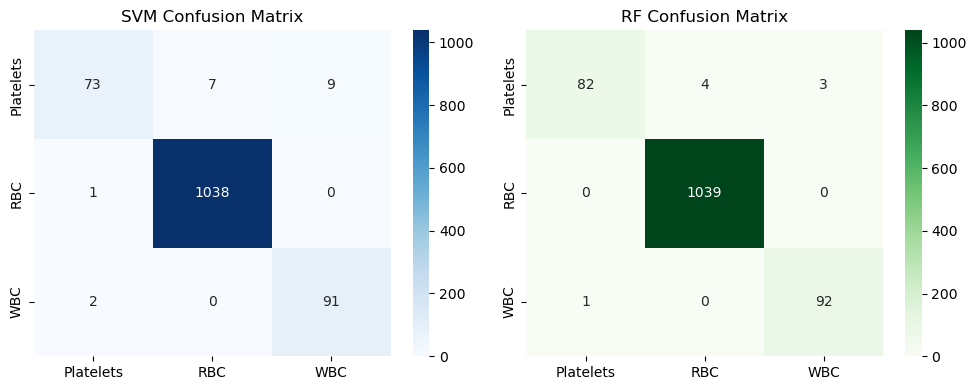

In [30]:
# 6.2 – Feature extraction and classical ML (SVM, RandomForest)
# Extract color, texture, simple stats from patches; train/test split; confusion matrix.


# Ensure scikit-learn is available
try:
    import sklearn
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn", "seaborn"])
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier


if not patches:
    raise RuntimeError("No patches found. Run the patch-building cell first.")


def patch_features(patch_img):
    arr = np.array(patch_img)
    # Color histogram (16 bins per channel)
    feats = []
    for c in range(3):
        hist, _ = np.histogram(arr[..., c], bins=16, range=(0, 255), density=True)
        feats.extend(hist.tolist())
    # Per-channel mean/std
    feats.extend(arr.mean(axis=(0, 1)).tolist())
    feats.extend(arr.std(axis=(0, 1)).tolist())
    # Entropy (grayscale)
    gray = (0.299 * arr[..., 0] + 0.587 * arr[..., 1] + 0.114 * arr[..., 2]).astype(np.uint8)
    h, _ = np.histogram(gray, bins=32, range=(0, 255), density=True)
    h = h + 1e-8
    entropy = -np.sum(h * np.log(h))
    feats.append(float(entropy))
    return np.array(feats, dtype=np.float32)

X = np.stack([patch_features(p["patch"]) for p in patches])
y_labels = [p["label"] for p in patches]
le = LabelEncoder()
y = le.fit_transform(y_labels)

print("Feature matrix:", X.shape)
print("Label distribution:", Counter(y_labels))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# SVM
svm_clf = SVC(kernel="rbf", C=2.0, gamma="scale")
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

# RandomForest
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("RF accuracy:", rf_acc)

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
cm_svm = confusion_matrix(y_test, svm_pred)
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_svm, ax=axes[0], annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
axes[0].set_title("SVM Confusion Matrix")
sns.heatmap(cm_rf, ax=axes[1], annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
axes[1].set_title("RF Confusion Matrix")
plt.tight_layout()
plt.show()


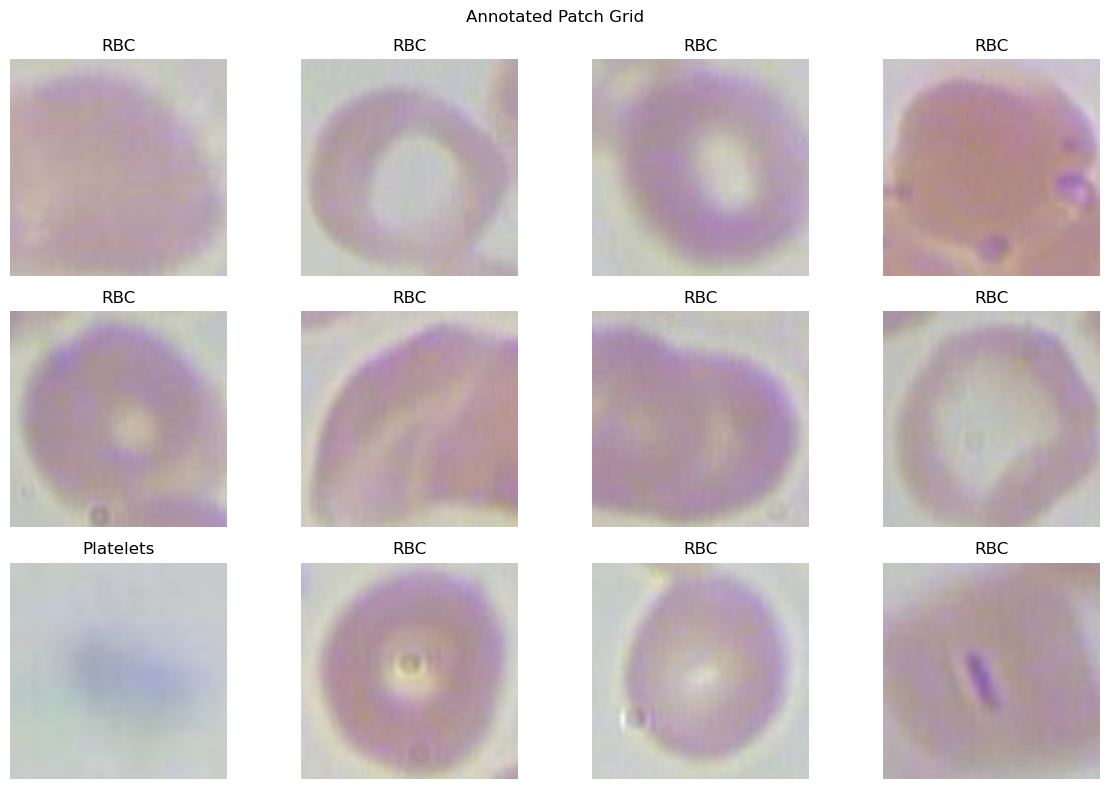

/tmp/ipykernel_2319125/2692088806.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette="Set2")


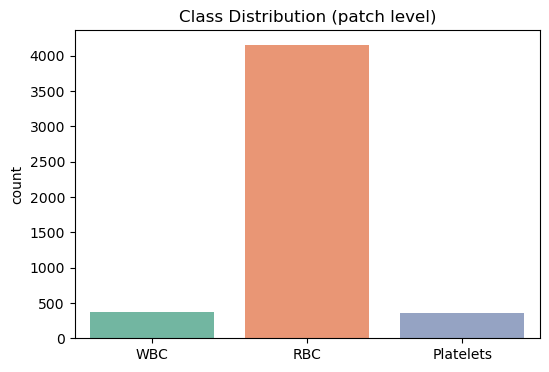

In [31]:
# 6.3 – Visualizations: annotated grid, class distribution


# Grid of sample patches
n_show = min(12, len(patches))
samples = random.sample(patches, n_show) if len(patches) >= n_show else patches
cols = 4
rows = int(np.ceil(n_show / cols))
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.axis('off')
    if i < n_show:
        p = samples[i]
        ax.imshow(p["patch"])
        ax.set_title(p["label"])
plt.suptitle("Annotated Patch Grid")
plt.tight_layout()
plt.show()

# Class distribution
counts = Counter([p["label"] for p in patches])
labels = list(counts.keys())
values = [counts[k] for k in labels]
plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=values, palette="Set2")
plt.title("Class Distribution (patch level)")
plt.ylabel("count")
plt.show()


2025-12-21 20:20:04.294651: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-21 20:20:04.547820: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8427 - loss: 0.4885 - val_accuracy: 0.9071 - val_loss: 0.2437
Epoch 2/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9481 - loss: 0.1428 - val_accuracy: 0.9645 - val_loss: 0.0855
Epoch 3/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9627 - loss: 0.0967 - val_accuracy: 0.9781 - val_loss: 0.0752
Epoch 4/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9684 - loss: 0.0807 - val_accuracy: 0.9508 - val_loss: 0.1092
Epoch 5/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9663 - loss: 0.0843 - val_accuracy: 0.9617 - val_loss: 0.0725
CNN test accuracy: 0.9664209485054016


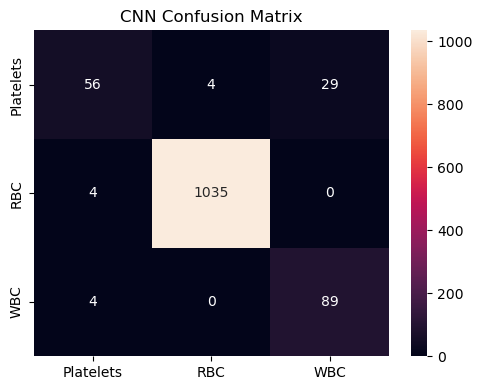

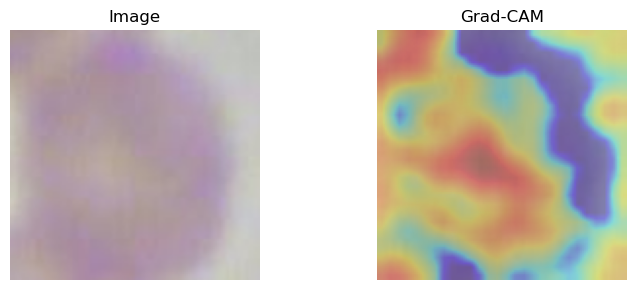

In [32]:
# 6.4 – Optional CNN (TensorFlow/Keras) and Grad-CAM
# Trains a small CNN on patches if TensorFlow is available; shows confusion matrix and Grad-CAM.

try:
    import tensorflow as tf
    from tensorflow.keras import layers, models
except Exception as e:
    print("TensorFlow not installed. Skip CNN. Install with: pip install tensorflow")
    tf = None

if tf is not None:
    # Prepare data
    imgs = np.stack([np.array(p["patch"]) for p in patches])  # (N,128,128,3)
    labels = np.array([p["label"] for p in patches])
    classes = sorted(set(labels))
    class_to_idx = {c:i for i,c in enumerate(classes)}
    y = np.array([class_to_idx[l] for l in labels])

    # Train/test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(imgs, y, test_size=0.25, stratify=y, random_state=42)
    # Normalize
    X_train = X_train.astype("float32")/255.0
    X_test = X_test.astype("float32")/255.0

    # Functional model (compatible with Keras 3 Grad-CAM)
    inputs = tf.keras.Input(shape=(128,128,3))
    x = layers.Conv2D(16, (3,3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(32, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D((2,2))(x)
    last_conv = layers.Conv2D(64, (3,3), activation='relu', name='last_conv')(x)
    x = layers.GlobalAveragePooling2D()(last_conv)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(len(classes), activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='blood_cnn')

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print("CNN test accuracy:", test_acc)

    # Confusion matrix
    from sklearn.metrics import confusion_matrix
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    import seaborn as sns
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title("CNN Confusion Matrix")
    plt.tight_layout()
    plt.show()

    # Grad-CAM for one sample
    def grad_cam(model, image_array, layer_name='last_conv'):
        # Build a model mapping input -> [conv outputs, predictions]
        conv_layer = model.get_layer(layer_name)
        grad_model = tf.keras.Model(inputs=model.input, outputs=[conv_layer.output, model.output])
        with tf.GradientTape() as tape:
            conv_outputs, predictions = grad_model(tf.expand_dims(image_array, axis=0))
            top_class = tf.reduce_max(predictions[0])
        grads = tape.gradient(top_class, conv_outputs)[0]
        conv_outputs = conv_outputs[0]
        # Channel-wise importance
        weights = tf.reduce_mean(grads, axis=(0,1))
        cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)
        cam = tf.maximum(cam, 0)
        cam = cam / (tf.reduce_max(cam) + 1e-8)
        cam = tf.image.resize(tf.expand_dims(tf.expand_dims(cam, -1), 0), (128,128))[0,...,0].numpy()
        return cam

    idx0 = 0
    img0 = X_test[idx0]
    cam0 = grad_cam(model, img0)
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    plt.imshow(img0)
    plt.title("Image")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(img0)
    plt.imshow(cam0, cmap='jet', alpha=0.35)
    plt.title("Grad-CAM")
    plt.axis('off')
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_2319125/3768872878.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette="Set3")


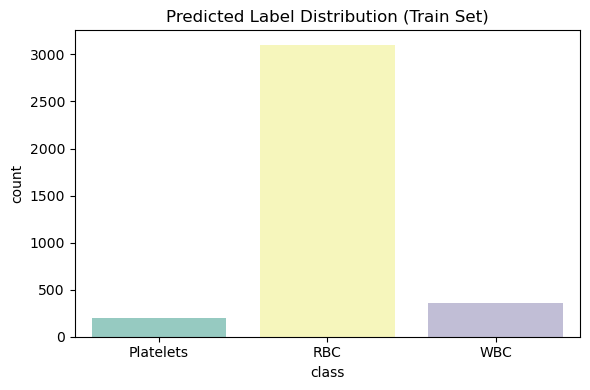

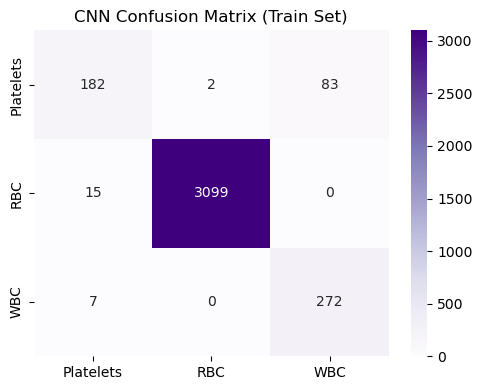

In [33]:
# 6.4 (viz) – Train set predicted labels visualization

# Ensure TensorFlow model and train set exist
has_tf = 'tf' in globals() and tf is not None
has_model = has_tf and 'model' in globals()
has_train = 'X_train' in globals() and 'y_train' in globals()
if not (has_model and has_train):
    print("Skip: TensorFlow model or train set not available.")
else:
    # Predict on train set
    y_pred_train = np.argmax(model.predict(X_train, verbose=0), axis=1)
    # Bar plot of predicted label distribution
    if 'classes' in globals():
        class_names = classes
    else:
        # Fallback: infer unique indices
        class_names = sorted(set(list(y_pred_train)))
    counts = {class_names[i]: int((y_pred_train == i).sum()) for i in range(len(class_names))}
    labels = list(counts.keys())
    values = [counts[k] for k in labels]
    plt.figure(figsize=(6,4))
    sns.barplot(x=labels, y=values, palette="Set3")
    plt.title("Predicted Label Distribution (Train Set)")
    plt.ylabel("count")
    plt.xlabel("class")
    plt.tight_layout()
    plt.show()
    
    # Optional: Confusion matrix on train set (true vs predicted)
    try:
        from sklearn.metrics import confusion_matrix
        cm_train = confusion_matrix(y_train, y_pred_train)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_train, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Purples')
        plt.title("CNN Confusion Matrix (Train Set)")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("Confusion matrix skipped:", e)

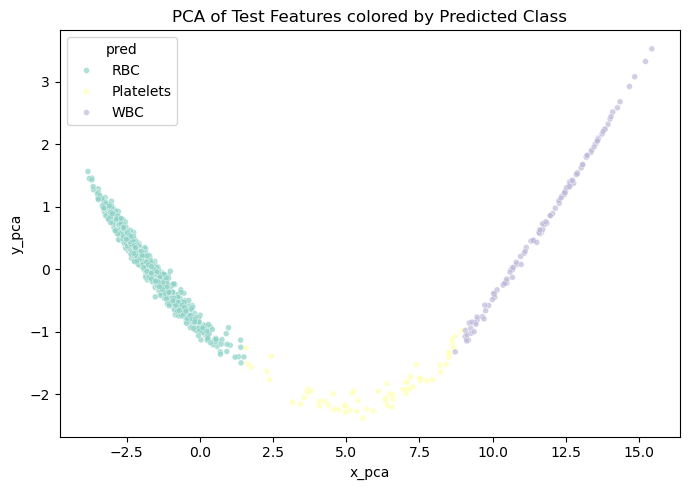

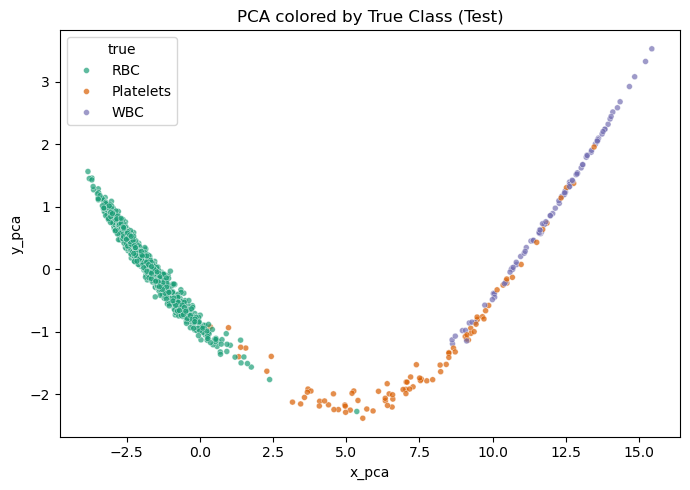

UMAP unavailable: No module named 'umap'


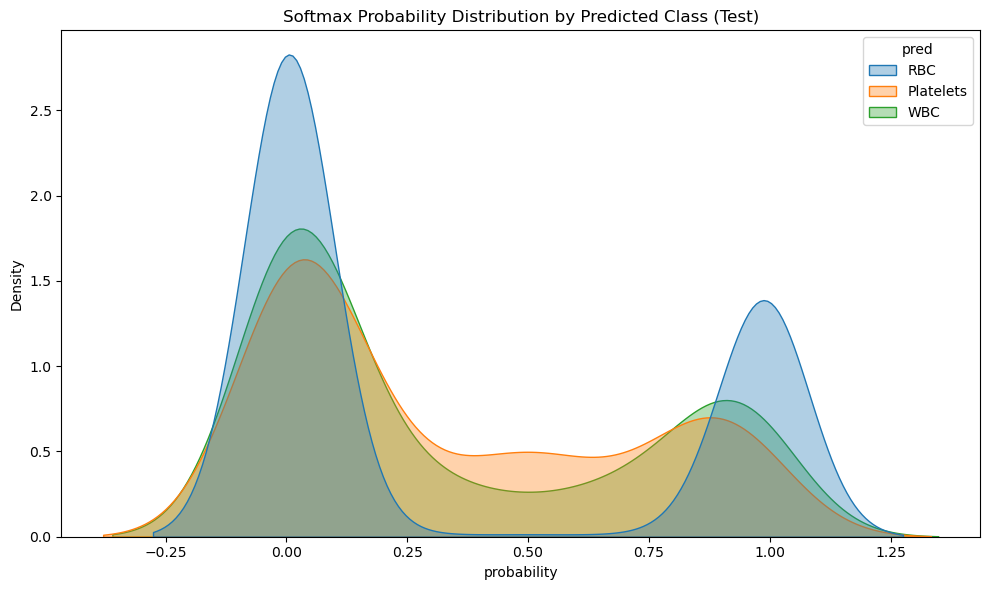

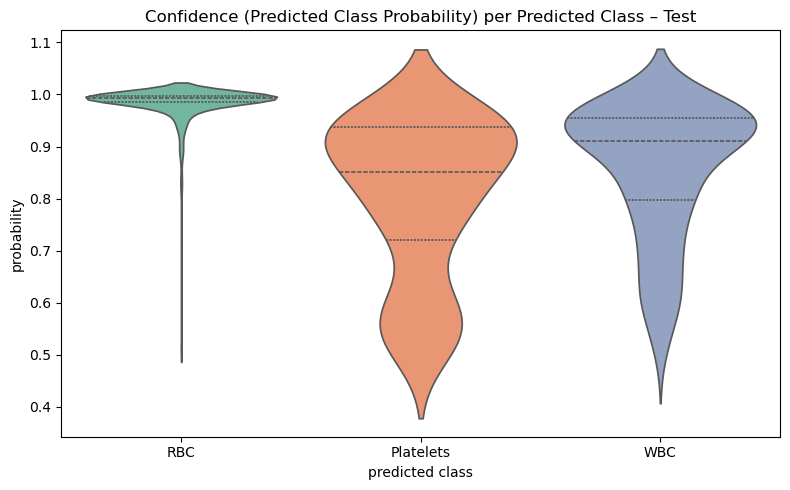

/tmp/ipykernel_2319125/332465907.py:98: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calib = merged.groupby('bin').agg(conf_mean=('prob','mean'), acc=('correct','mean')).reset_index()


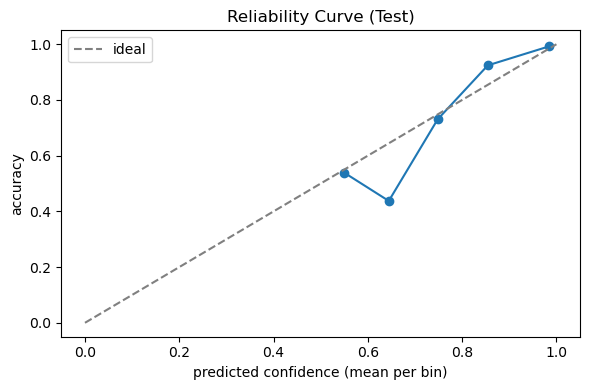

In [34]:
# 6.4 (viz-test) – Test-set clustering and confidence visualizations

has_tf = 'tf' in globals() and tf is not None
ready = has_tf and 'model' in globals() and 'X_test' in globals() and 'y_test' in globals()
if not ready:
    print("Skip: TensorFlow model or test set not available.")
else:
    # Build feature extractor (reuse if available)
    try:
        feature_model
    except NameError:
        try:
            feature_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
        except Exception as e:
            print("Fallback to GAP features:", e)
            try:
                last_conv_layer = model.get_layer('last_conv')
                last_conv_output = last_conv_layer.output
            except Exception:
                last_conv_output = model.layers[-3].output
            gap = tf.keras.layers.GlobalAveragePooling2D()(last_conv_output)
            feature_model = tf.keras.Model(inputs=model.input, outputs=gap)
    
    # Compute test features and predictions
    test_feats = feature_model.predict(X_test, verbose=0)
    probs_test = model.predict(X_test, verbose=0)
    y_pred_test = np.argmax(probs_test, axis=1)
    class_names = classes if 'classes' in globals() else [str(i) for i in range(probs_test.shape[1])]
    
    # PCA clustering (predicted)
    try:
        from sklearn.decomposition import PCA
        Z_pca_test = PCA(n_components=2, random_state=42).fit_transform(test_feats)
        dfpca = pd.DataFrame({'x_pca': Z_pca_test[:,0], 'y_pca': Z_pca_test[:,1], 'pred': [class_names[i] for i in y_pred_test], 'true': [class_names[i] if i < len(class_names) else i for i in y_test]})
        plt.figure(figsize=(7,5))
        sns.scatterplot(data=dfpca, x='x_pca', y='y_pca', hue='pred', alpha=0.7, s=18, palette='Set3', legend='brief')
        plt.title('PCA of Test Features colored by Predicted Class')
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(7,5))
        sns.scatterplot(data=dfpca, x='x_pca', y='y_pca', hue='true', alpha=0.7, s=18, palette='Dark2', legend='brief')
        plt.title('PCA colored by True Class (Test)')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print('PCA unavailable:', e)
    
    # UMAP clustering (predicted)
    try:
        import umap
        Z_umap_test = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(test_feats)
        dfumap = pd.DataFrame({'x_umap': Z_umap_test[:,0], 'y_umap': Z_umap_test[:,1], 'pred': [class_names[i] for i in y_pred_test], 'true': [class_names[i] if i < len(class_names) else i for i in y_test]})
        plt.figure(figsize=(7,5))
        sns.scatterplot(data=dfumap, x='x_umap', y='y_umap', hue='pred', alpha=0.7, s=18, palette='Set2', legend='brief')
        plt.title('UMAP of Test Features colored by Predicted Class')
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(7,5))
        sns.scatterplot(data=dfumap, x='x_umap', y='y_umap', hue='true', alpha=0.7, s=18, palette='Dark2', legend='brief')
        plt.title('UMAP colored by True Class (Test)')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print('UMAP unavailable:', e)
    
    # Probability histograms and calibration (test)
    records = []
    for i, p in enumerate(probs_test):
        pred_idx = y_pred_test[i]
        true_idx = y_test[i]
        for c in range(len(class_names)):
            records.append({'sample': i, 'class': class_names[c], 'prob': float(p[c]), 'pred': class_names[pred_idx], 'true': class_names[true_idx] if true_idx < len(class_names) else str(true_idx)})
    dfpt = pd.DataFrame(records)
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=dfpt, x='prob', hue='pred', common_norm=False, fill=True, alpha=0.35)
    plt.title('Softmax Probability Distribution by Predicted Class (Test)')
    plt.xlabel('probability')
    plt.tight_layout()
    plt.show()
    conf_t = dfpt[dfpt['class'] == dfpt['pred']]
    fig, ax = plt.subplots(figsize=(8,5))
    sns.violinplot(data=conf_t, x='pred', y='prob', hue='pred', palette='Set2', inner='quartile', ax=ax)
    try:
        ax.legend_.remove()
    except Exception:
        pass
    ax.set_title('Confidence (Predicted Class Probability) per Predicted Class – Test')
    ax.set_xlabel('predicted class'); ax.set_ylabel('probability')
    plt.tight_layout(); plt.show()
    # Reliability curve
    try:
        bins = np.linspace(0, 1, 11)
        sample_conf = dfpt[dfpt['class'] == dfpt['pred']][['sample','prob','pred']]
        sample_true = dfpt.groupby('sample').agg({'true':'first'}).reset_index()
        merged = sample_conf.merge(sample_true, on='sample')
        merged['correct'] = (merged['pred'] == merged['true']).astype(int)
        merged['bin'] = pd.cut(merged['prob'], bins, include_lowest=True)
        calib = merged.groupby('bin').agg(conf_mean=('prob','mean'), acc=('correct','mean')).reset_index()
        plt.figure(figsize=(6,4))
        plt.plot(calib['conf_mean'], calib['acc'], marker='o')
        plt.plot([0,1],[0,1],'--',color='gray',label='ideal')
        plt.title('Reliability Curve (Test)')
        plt.xlabel('predicted confidence (mean per bin)')
        plt.ylabel('accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print('Reliability curve (test) skipped:', e)

**❓ Questions -- Answer :**

- **Peut-on automatiser la classification des types cellulaires ?**
Oui : méthodes classiques (SVM/RF/KNN) pour peu de données et l’interprétabilité ; deep learning (CNN) plus robuste et performant avec assez d’annotations.

- **Quelle précision atteint-on avec des méthodes classiques vs deep learning ?**
Classiques ~75–90% selon données et features ; deep learning ~90–98% (et >90% mAP) avec dataset bien annoté, augmentation et bonne validation.

- **Les anomalies cellulaires sont-elles détectables visuellement ?**
Oui pour beaucoup d’anomalies morphologiques ; en automatique, pipeline détection + classification, dépendant de la qualité des images et des annotations.

---

<h2 style="padding:10px; color:#FFF; background:#882255">PHASE 7 : SYNTHÈSE & RECOMMANDATIONS</h2>

---

<h2 style="padding:8px; color:#FFF; background:#E3CFC6">Tableau Récapitulatif des Couplages Datasets</h2>

| **Phase** | **Datasets** | **Type d'analyse** | **Flow** | **Evolution** |
|---|---|---|---|---|
| Exploration | 1, 2, 3, 5 | Descriptive, nettoyage | Clean & Structure | ✅|
| Démographie | 5 | Descriptive, visualisation | Analyze & Visualize |
| Pression artérielle | 2 | Descriptive, distribution | Analyze & Visualize |
| Biomarqueurs | 3 | Corrélations, profils | Analyze & Visualize |
| Géographie mondiale | 4 | Cartographie, comparaisons | Analyze & Visualize |
| Géographie Inde | 6 | Cartographie, épidémiologie | Analyze & Visualize |
| Risques hypertension | 1 + 2 + 3 | Corrélations, tests statistiques | Analyze & Model |
| Prédiction don | 1 + 2 + 3 + 5 | Classification, régression | Model |
| Segmentation | 5 | Clustering | Model & Analyze |
| Vision | 7 | Classification d'images | Model & Visualize | ✅|
| Dashboard | Tous | Synthèse interactive | Visualize |

<div style="padding:8px; margin:0px -20px; color:#FFF; background:#2E1A24; text-align:right">● ● ● </div>